# Exploratory Data Analysis and Cleaning for Robo Fault DataSet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from datetime import timedelta
from sklearn.impute import KNNImputer
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [4]:
df = pd.read_excel('dataset_02052023.xlsx')
df.head()

Num                 Timestamp  Current_J0  Temperature_T0  Current_J1  \
0    1  2022-10-26T08:17:21.847Z    0.109628          27.875   -2.024669   
1    2  2022-10-26T08:17:22.852Z    0.595605          27.875   -2.278456   
2    3  2022-10-26T08:17:23.857Z   -0.229474          27.875   -2.800408   
3    4  2022-10-26T08:17:24.863Z    0.065053          27.875   -3.687768   
4    5  2022-10-26T08:17:25.877Z    0.884140          27.875   -2.938830   

   Temperature_J1  Current_J2  Temperature_J2  Current_J3  Temperature_J3  \
0         29.3750   -1.531442         29.3750   -0.998570         32.1250   
1         29.3125   -0.866556         29.4375   -0.206097         32.1875   
2         29.3125   -2.304336         29.4375   -0.351499         32.1250   
3         29.3125   -1.217652         29.4375   -1.209115         32.1250   
4         29.3750   -1.794076         29.4375   -2.356471         32.1875   

   ...      Speed_J0  Speed_J1  Speed_J2  Speed_J3  Speed_J4  Speed_J5  \
0  ...  2.955651e-01 -0.000490  0.001310 -0.132836 -0.007479 -0.152962   
1  ... -7.391485e-30 -0.000304  0.002185  0.001668 -0.000767  0.000417   
2  ...  1.369386e-01  0.007795 -2.535874  0.379867  0.000455 -0.496856   
3  ... -9.030032e-02 -0.004911 -0.009096 -0.384196  0.018411  0.425559   
4  ...  1.268088e-01  0.005567  0.001138 -0.353284  0.014994  0.180989   

   Tool_current  cycle   Robot_ProtectiveStop  grip_lost  
0      0.082732       1                   0.0      False  
1      0.505895       1                   0.0      False  
2      0.079420       1                   0.0      False  
3      0.083325       1                   0.0      False  
4      0.086379       1                   0.0      False  

[5 rows x 24 columns]

In [5]:
df.isnull().sum()

Num                      0
Timestamp                0
Current_J0              46
Temperature_T0          54
Current_J1              54
Temperature_J1          54
Current_J2              54
Temperature_J2          54
Current_J3              54
Temperature_J3          54
Current_J4              54
Temperature_J4          54
Current_J5              54
Temperature_J5          54
Speed_J0                54
Speed_J1                54
Speed_J2                54
Speed_J3                54
Speed_J4                54
Speed_J5                54
Tool_current            54
cycle                    0
Robot_ProtectiveStop    54
grip_lost                0
dtype: int64

In [6]:
null_counts = df.isnull().sum()
total_rows = len(df)

null_percentage = (null_counts / total_rows) * 100
print(null_percentage)

Num                     0.000000
Timestamp               0.000000
Current_J0              0.620867
Temperature_T0          0.728843
Current_J1              0.728843
Temperature_J1          0.728843
Current_J2              0.728843
Temperature_J2          0.728843
Current_J3              0.728843
Temperature_J3          0.728843
Current_J4              0.728843
Temperature_J4          0.728843
Current_J5              0.728843
Temperature_J5          0.728843
Speed_J0                0.728843
Speed_J1                0.728843
Speed_J2                0.728843
Speed_J3                0.728843
Speed_J4                0.728843
Speed_J5                0.728843
Tool_current            0.728843
cycle                   0.000000
Robot_ProtectiveStop    0.728843
grip_lost               0.000000
dtype: float64


The Nulls Percentage is Small but Dropping the nulls in a time series analysis will be  risky

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Num                   7409 non-null   int64  
 1   Timestamp             7409 non-null   object 
 2   Current_J0            7363 non-null   float64
 3   Temperature_T0        7355 non-null   float64
 4   Current_J1            7355 non-null   float64
 5   Temperature_J1        7355 non-null   float64
 6   Current_J2            7355 non-null   float64
 7   Temperature_J2        7355 non-null   float64
 8   Current_J3            7355 non-null   float64
 9   Temperature_J3        7355 non-null   float64
 10  Current_J4            7355 non-null   float64
 11  Temperature_J4        7355 non-null   float64
 12  Current_J5            7355 non-null   float64
 13  Temperature_J5        7355 non-null   float64
 14  Speed_J0              7355 non-null   float64
 15  Speed_J1             

In [8]:
for col in ["Robot_ProtectiveStop", "grip_lost"]:
    df[col] = df[col].astype("boolean")   # nullable boolean, NaNs preserved as <NA>


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Num                   7409 non-null   int64  
 1   Timestamp             7409 non-null   object 
 2   Current_J0            7363 non-null   float64
 3   Temperature_T0        7355 non-null   float64
 4   Current_J1            7355 non-null   float64
 5   Temperature_J1        7355 non-null   float64
 6   Current_J2            7355 non-null   float64
 7   Temperature_J2        7355 non-null   float64
 8   Current_J3            7355 non-null   float64
 9   Temperature_J3        7355 non-null   float64
 10  Current_J4            7355 non-null   float64
 11  Temperature_J4        7355 non-null   float64
 12  Current_J5            7355 non-null   float64
 13  Temperature_J5        7355 non-null   float64
 14  Speed_J0              7355 non-null   float64
 15  Speed_J1             

In [10]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


Number of duplicate rows: 0


In [11]:
df["Timestamp"] = df["Timestamp"].str.replace('"', '', regex=False)


df["Timestamp"] = pd.to_datetime(df["Timestamp"], utc=True, errors="coerce")

# KNN ns Linear Interplotation to the Null Values

In [12]:
null_counts = df.isna().sum()
cols_with_nulls = null_counts[null_counts > 0].index.tolist()


numeric_nulls = [
    c for c in cols_with_nulls
    if pd.api.types.is_numeric_dtype(df[c]) and not pd.api.types.is_bool_dtype(df[c])
]

print(numeric_nulls)

['Current_J0', 'Temperature_T0', 'Current_J1', 'Temperature_J1', 'Current_J2', 'Temperature_J2', 'Current_J3', 'Temperature_J3', 'Current_J4', 'Temperature_J4', 'Current_J5', 'Temperature_J5', 'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5', 'Tool_current']


In [13]:
imputer = KNNImputer(n_neighbors=5)
df_knn = df.copy()
df_knn[numeric_nulls] = imputer.fit_transform(df_knn[numeric_nulls])

In [14]:
df_knn.isnull().sum()

Num                      0
Timestamp                0
Current_J0               0
Temperature_T0           0
Current_J1               0
Temperature_J1           0
Current_J2               0
Temperature_J2           0
Current_J3               0
Temperature_J3           0
Current_J4               0
Temperature_J4           0
Current_J5               0
Temperature_J5           0
Speed_J0                 0
Speed_J1                 0
Speed_J2                 0
Speed_J3                 0
Speed_J4                 0
Speed_J5                 0
Tool_current             0
cycle                    0
Robot_ProtectiveStop    54
grip_lost                0
dtype: int64

In [15]:


def _ensure_time_column(df, time_col='Timestamp'):
    
    out = df.copy()
    if time_col not in out.columns:
        out[time_col] = out.index

    out[time_col] = pd.to_datetime(out[time_col], errors='coerce', utc=True)
 
    out = out.dropna(subset=[time_col])
    return out

def per_cycle_linear_interpolate_numeric(df, cols, time_col='Timestamp', cycle_col='cycle '):
    
    out = _ensure_time_column(df, time_col)
    out = out.sort_values([cycle_col, time_col])

    
    use_cols = []
    for c in cols:
        if c in out.columns and pd.api.types.is_numeric_dtype(out[c]) and not pd.api.types.is_bool_dtype(out[c]):
            use_cols.append(c)

    for c in use_cols:
        out[c] = (out.groupby(cycle_col, group_keys=False)[c]
                    .apply(lambda s: s.interpolate(method='linear', limit_direction='both')))
    return out

def compare_imputation_numeric(df, df_knn, cols, time_col='Timestamp', cycle_col='cycle ', cycle_id=None):
   

    df_lin = per_cycle_linear_interpolate_numeric(df, cols, time_col, cycle_col)


    raw_use = df.copy()
    raw_use = _ensure_time_column(raw_use, time_col)
    na_any = raw_use[cols].isna().any(axis=1) if set(cols).issubset(raw_use.columns) else pd.Series(False, index=raw_use.index)

    if cycle_id is None:
        if na_any.any():
            cycle_id = raw_use.loc[na_any, cycle_col].iloc[0]
        else:
            
            cycle_id = raw_use[cycle_col].iloc[0]

 
    g_raw = raw_use[raw_use[cycle_col] == cycle_id].sort_values(time_col)
    g_knn = _ensure_time_column(df_knn, time_col)
    g_knn = g_knn[g_knn[cycle_col] == cycle_id].sort_values(time_col)
    g_lin = _ensure_time_column(df_lin, time_col)
    g_lin = g_lin[g_lin[cycle_col] == cycle_id].sort_values(time_col)

    for col in cols:
        if col not in g_raw.columns:   
            print(f"[skip] {col}: not found in raw DataFrame.")
            continue
        if not (pd.api.types.is_numeric_dtype(g_raw[col]) and not pd.api.types.is_bool_dtype(g_raw[col])):
            print(f"[skip] {col}: not numeric or is boolean.")
            continue

        plt.figure(figsize=(12,4))
        plt.scatter(g_raw[time_col], g_raw[col], color="blue", label="raw (with NaN)", alpha=0.6)

        if col in g_knn.columns:
            plt.plot(g_knn[time_col], g_knn[col], label='KNN fill', lw=2)
        if col in g_lin.columns:
            plt.plot(g_lin[time_col], g_lin[col], label='Linear fill', lw=2)
        plt.title(f"Imputation comparison • {col} • cycle={cycle_id}")
        plt.xlabel('time');
        plt.ylabel(col);
        plt.legend();
        plt.tight_layout();
        plt.show()

        miss_mask = g_raw[col].isna()
        if miss_mask.any() and (col in g_knn.columns) and (col in g_lin.columns):

            knn_vals = g_knn.loc[miss_mask.index, col].reindex(g_raw.index)[miss_mask]
            lin_vals = g_lin.loc[miss_mask.index, col].reindex(g_raw.index)[miss_mask]
            diffs = knn_vals.to_numpy() - lin_vals.to_numpy()
            print(f"{col} — missing points: {miss_mask.sum()}, "
                  f"mean(KNN−LIN)={np.nanmean(diffs):.4g}, "
                  f"std={np.nanstd(diffs):.4g}")
        else:
            print(f"{col} — no NaNs at this cycle or columns missing in one of the DataFrames.")


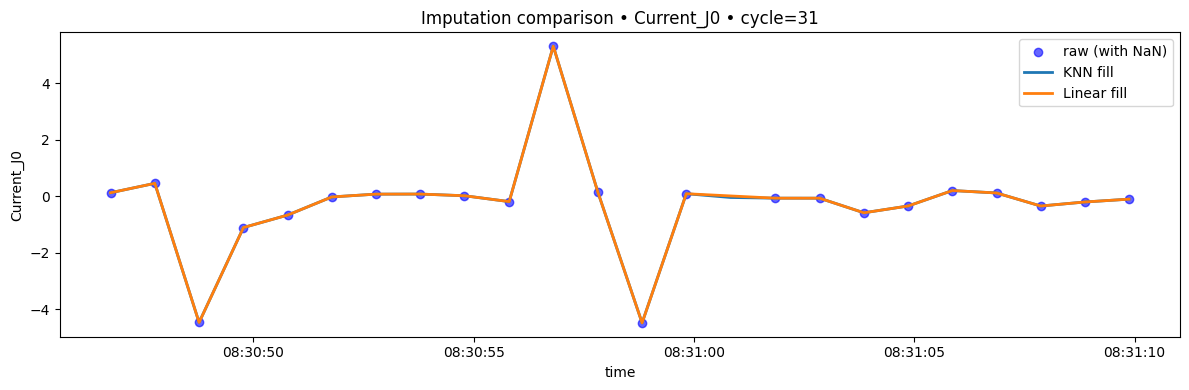

Current_J0 — missing points: 1, mean(KNN−LIN)=-0.05471, std=0


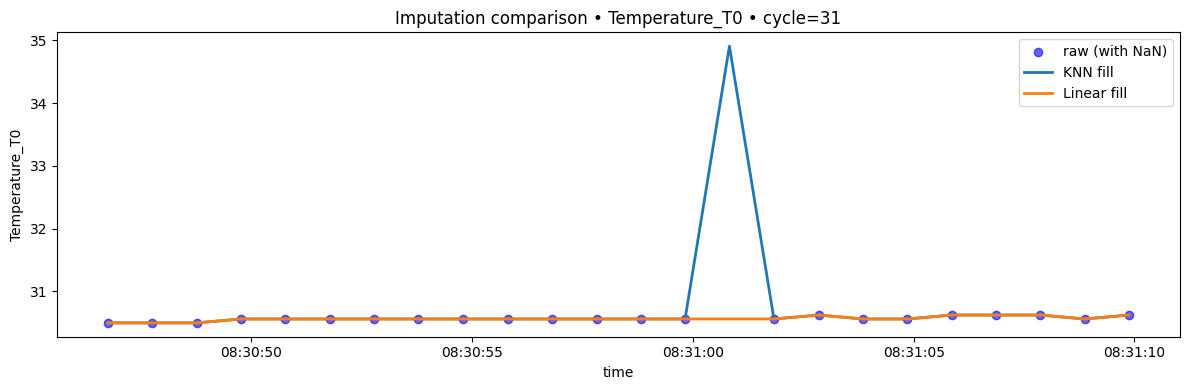

Temperature_T0 — missing points: 1, mean(KNN−LIN)=4.344, std=0


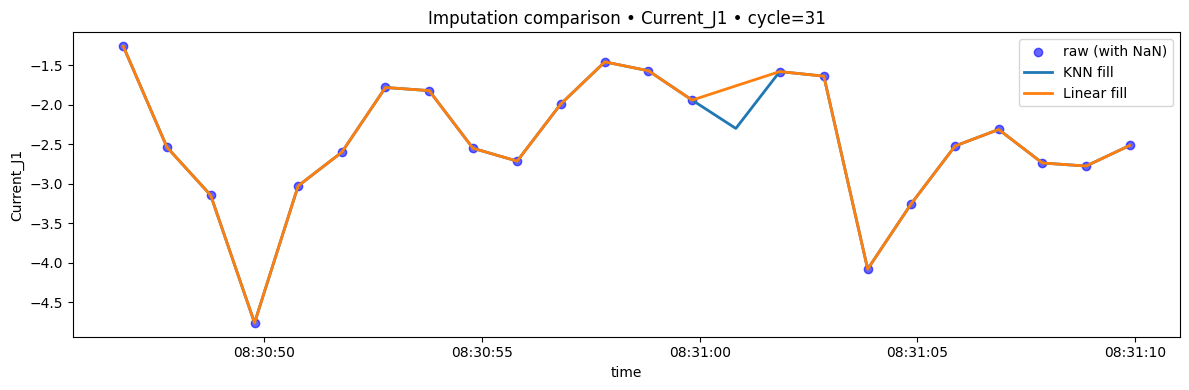

Current_J1 — missing points: 1, mean(KNN−LIN)=-0.5389, std=0


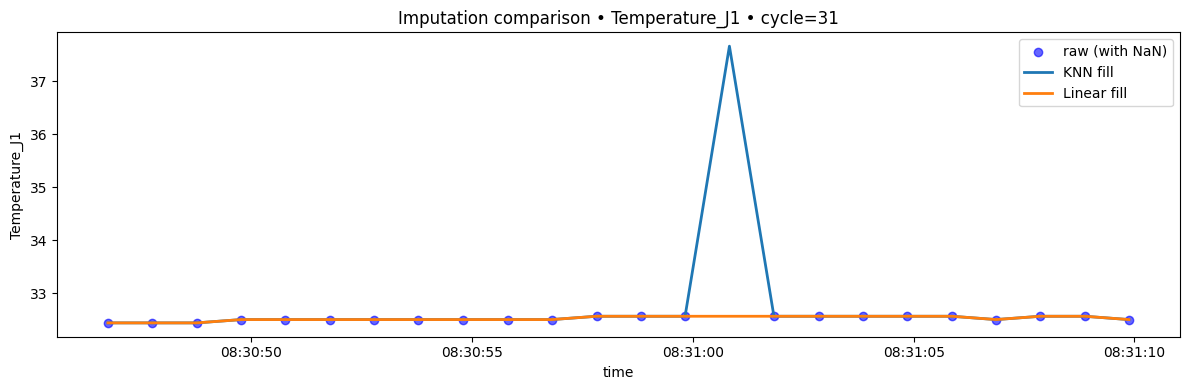

Temperature_J1 — missing points: 1, mean(KNN−LIN)=5.097, std=0


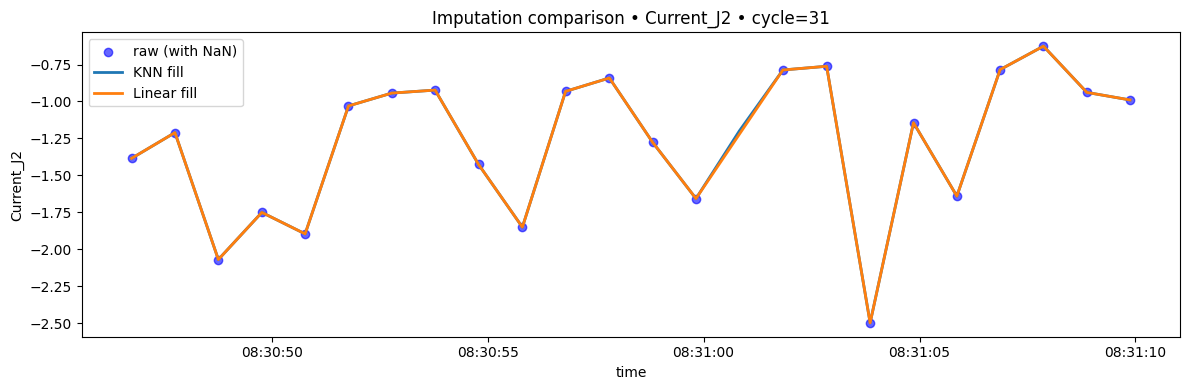

Current_J2 — missing points: 1, mean(KNN−LIN)=0.02273, std=0


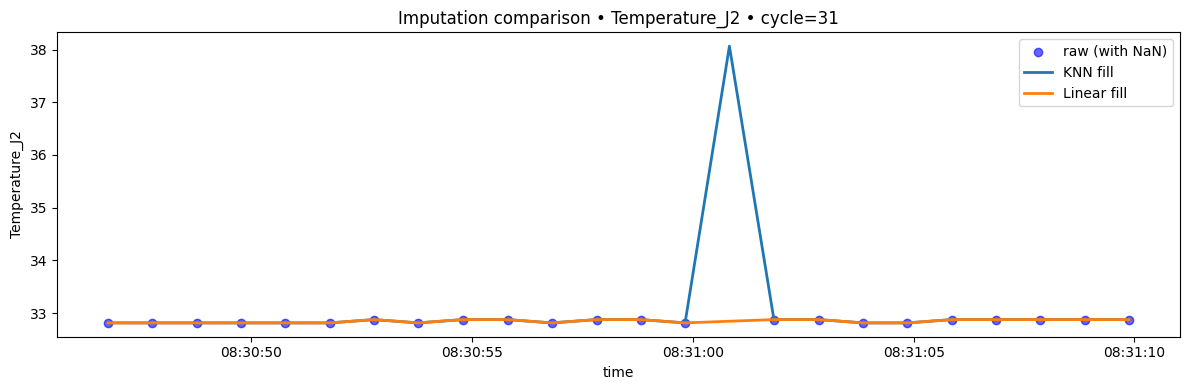

Temperature_J2 — missing points: 1, mean(KNN−LIN)=5.22, std=0


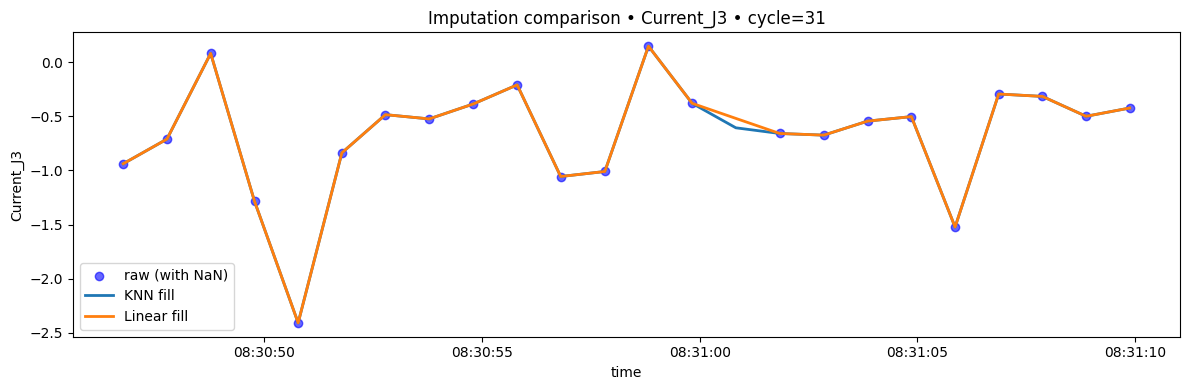

Current_J3 — missing points: 1, mean(KNN−LIN)=-0.08697, std=0


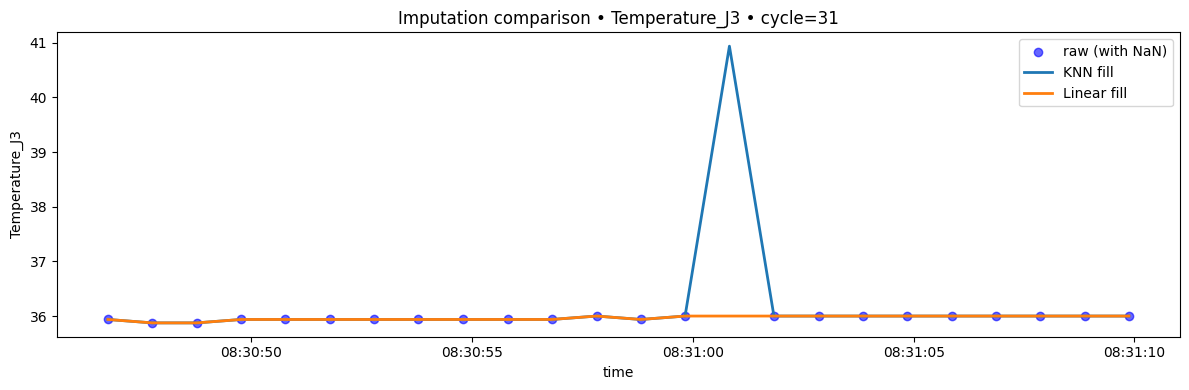

Temperature_J3 — missing points: 1, mean(KNN−LIN)=4.937, std=0


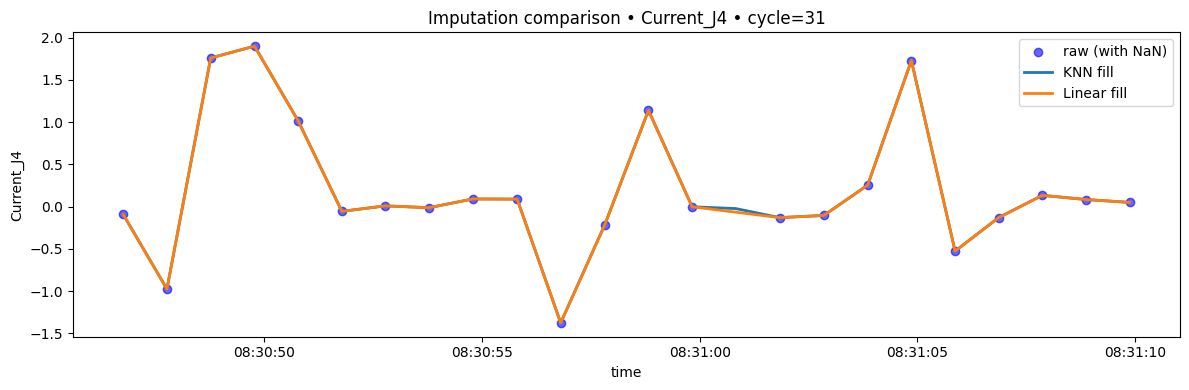

Current_J4 — missing points: 1, mean(KNN−LIN)=0.04278, std=0


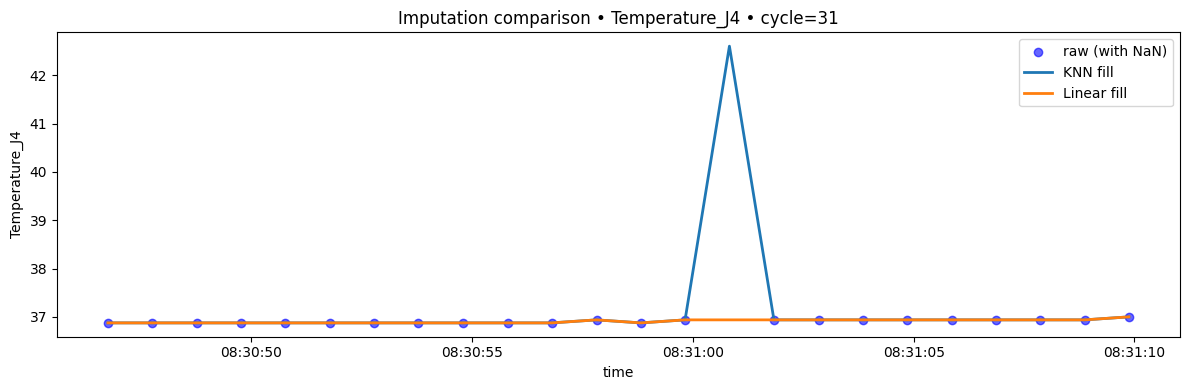

Temperature_J4 — missing points: 1, mean(KNN−LIN)=5.668, std=0


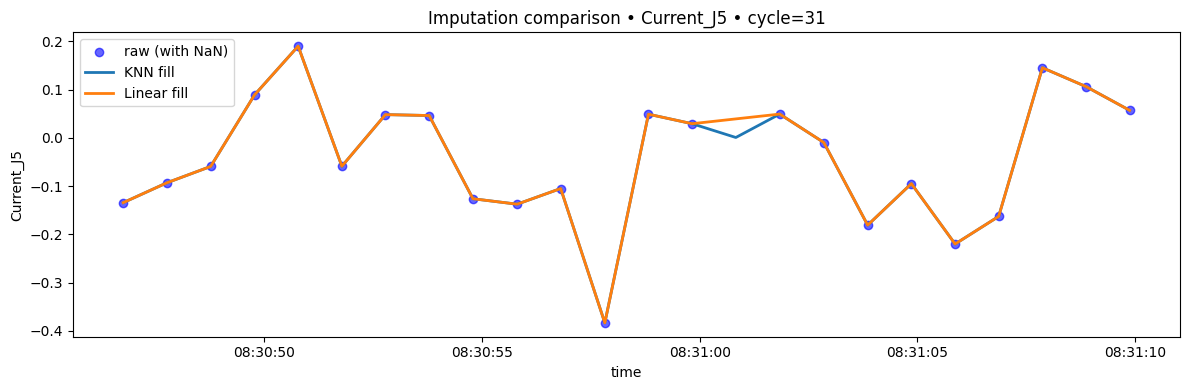

Current_J5 — missing points: 1, mean(KNN−LIN)=-0.03857, std=0


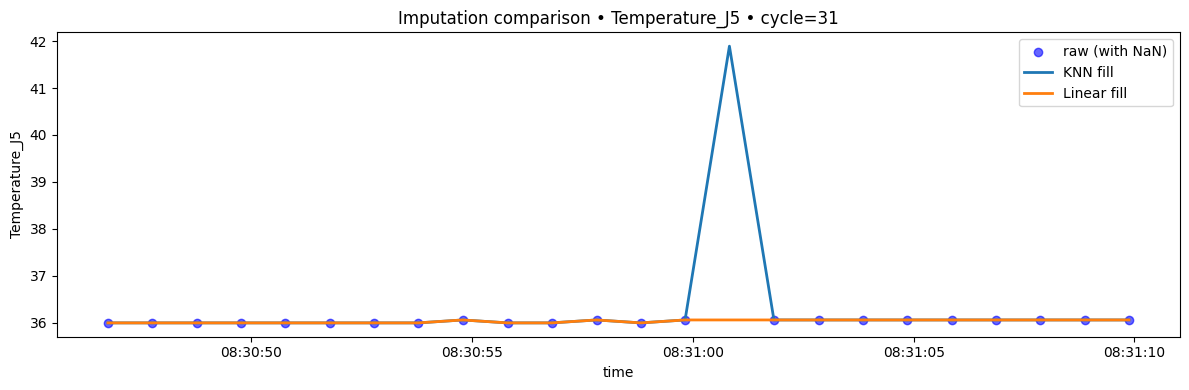

Temperature_J5 — missing points: 1, mean(KNN−LIN)=5.829, std=0


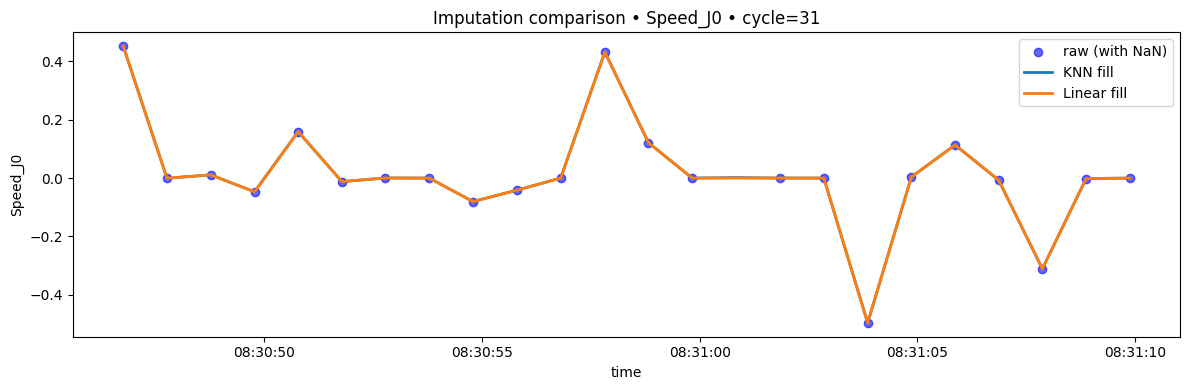

Speed_J0 — missing points: 1, mean(KNN−LIN)=0.001617, std=0


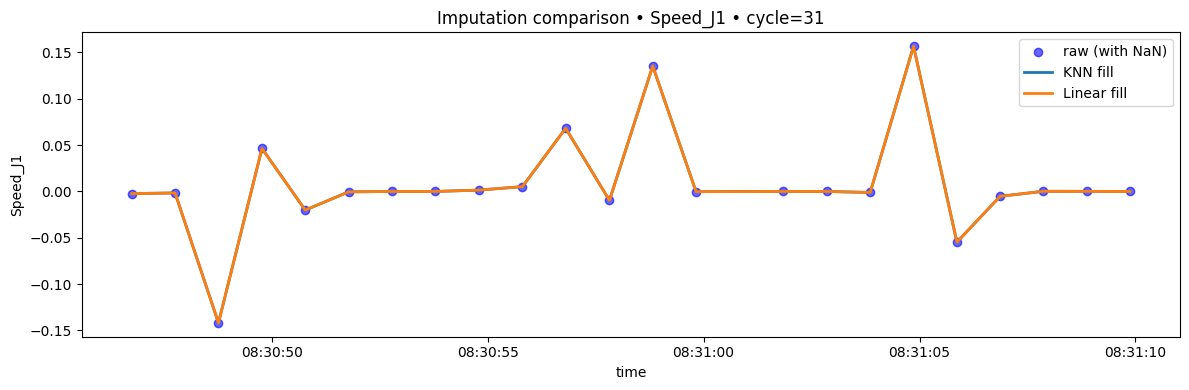

Speed_J1 — missing points: 1, mean(KNN−LIN)=0.0001764, std=0


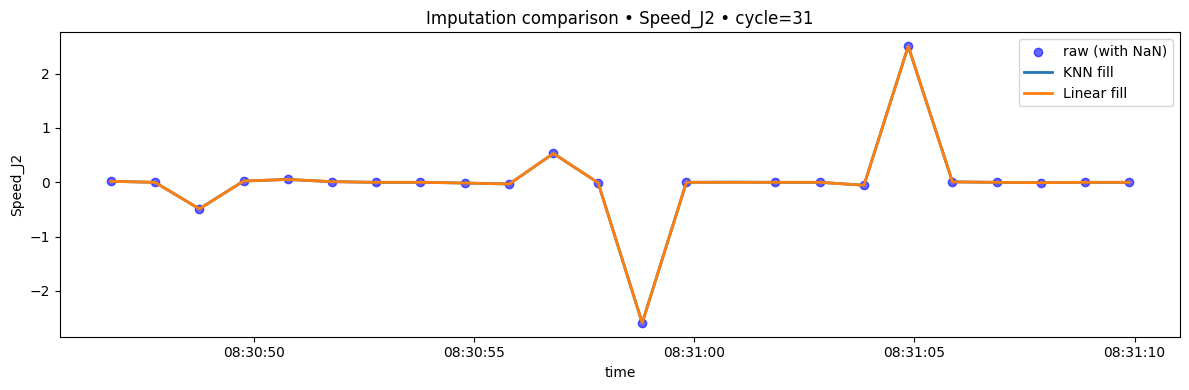

Speed_J2 — missing points: 1, mean(KNN−LIN)=0.003733, std=0


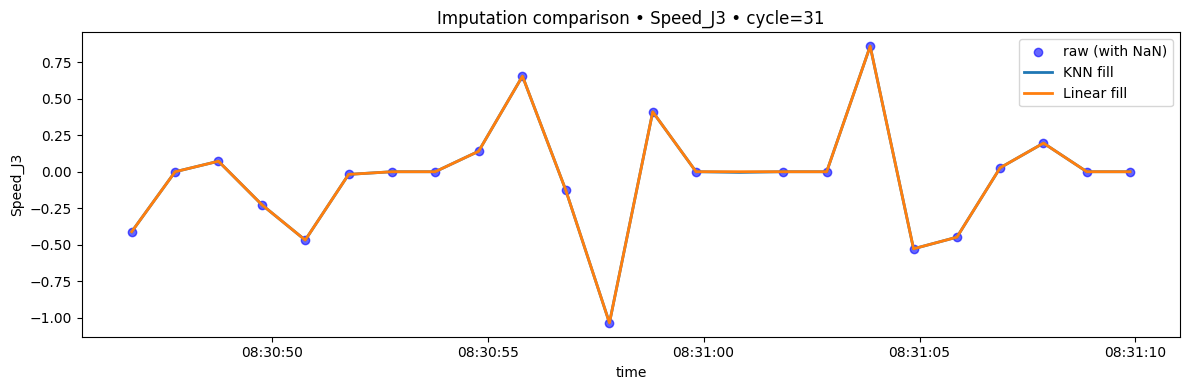

Speed_J3 — missing points: 1, mean(KNN−LIN)=-0.00468, std=0


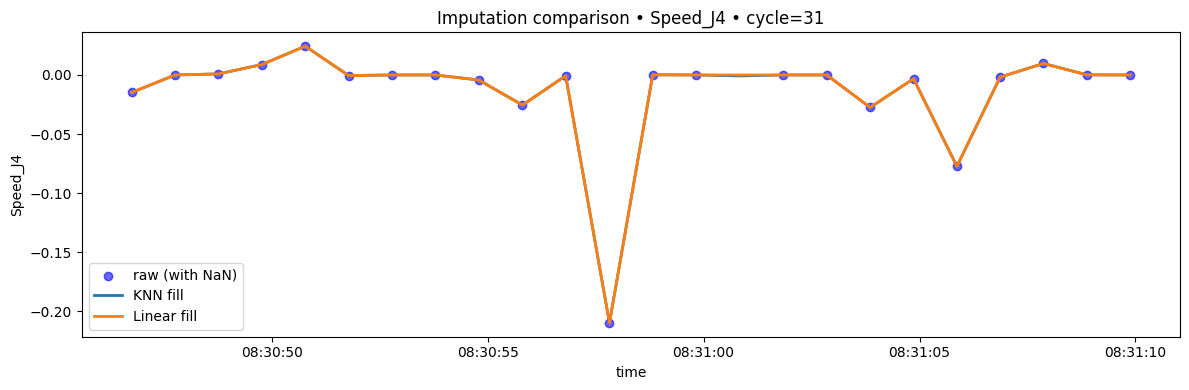

Speed_J4 — missing points: 1, mean(KNN−LIN)=-0.0008095, std=0


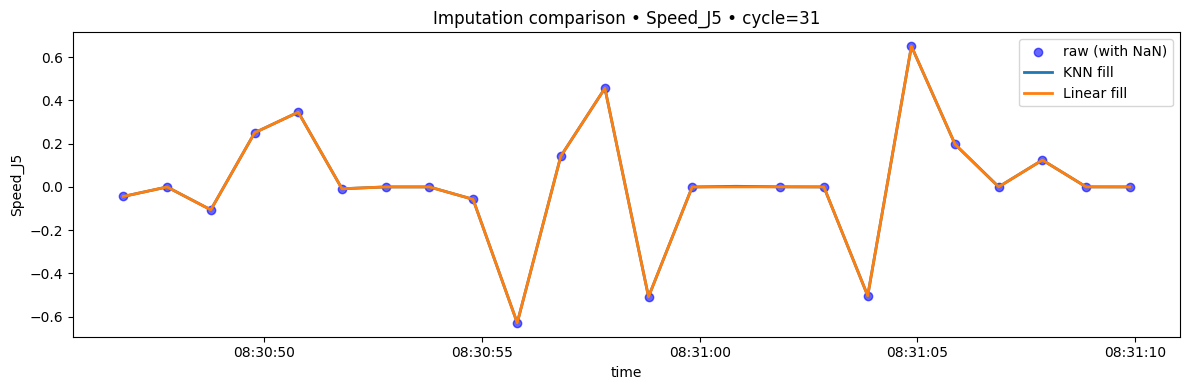

Speed_J5 — missing points: 1, mean(KNN−LIN)=0.002807, std=0


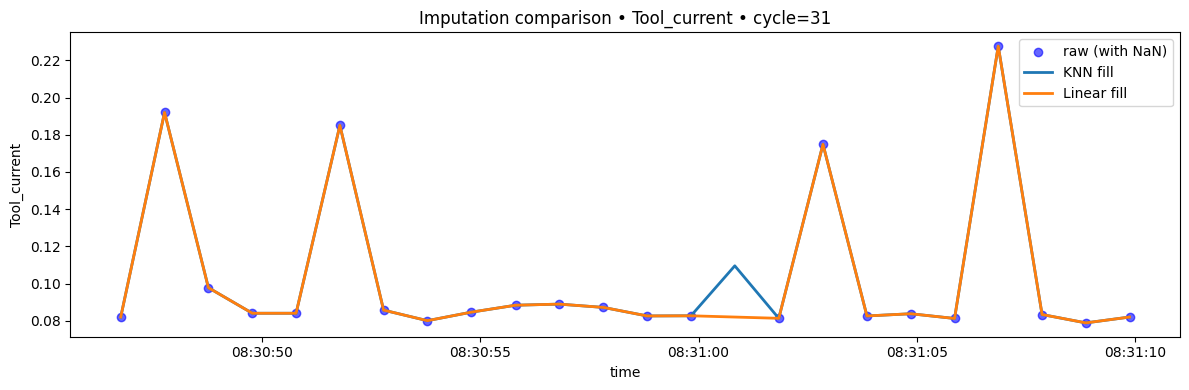

Tool_current — missing points: 1, mean(KNN−LIN)=0.02756, std=0


In [16]:
compare_imputation_numeric(
    df=df,          
    df_knn=df_knn,      
    cols=numeric_nulls,  
    time_col='Timestamp',
    cycle_col='cycle '  
)


In [17]:

df_lin = per_cycle_linear_interpolate_numeric(
    df, cols=numeric_nulls, time_col='Timestamp', cycle_col='cycle '
)


In [18]:
def mae_at_missing(raw, a, b, cols):
    out = {}
    for c in cols:
        miss = raw[c].isna()
        if miss.any():
            a_vals = a.loc[miss, c]
            b_vals = b.loc[miss, c]
            out[c] = (a_vals - b_vals).abs().mean()
    return pd.Series(out).sort_values(ascending=False)

mae_lin_vs_knn = mae_at_missing(df, df_lin, df_knn, numeric_nulls)
mae_lin_vs_knn.head(12)


Temperature_J4    3.136945
Temperature_J5    3.113281
Temperature_J2    2.911979
Temperature_J1    2.878327
Temperature_J3    2.743218
Temperature_T0    2.465909
Current_J1        0.562891
Current_J2        0.496093
Speed_J2          0.454737
Current_J0        0.416052
Current_J4        0.319901
Current_J3        0.271751
dtype: float64

In [19]:
df_lin.isnull().sum()

Num                      0
Timestamp                0
Current_J0               0
Temperature_T0           0
Current_J1               0
Temperature_J1           0
Current_J2               0
Temperature_J2           0
Current_J3               0
Temperature_J3           0
Current_J4               0
Temperature_J4           0
Current_J5               0
Temperature_J5           0
Speed_J0                 0
Speed_J1                 0
Speed_J2                 0
Speed_J3                 0
Speed_J4                 0
Speed_J5                 0
Tool_current             0
cycle                    0
Robot_ProtectiveStop    54
grip_lost                0
dtype: int64

## Handling Missing Data
 
We compared two approaches:

- **KNN Imputer**: sometimes produced unrealistic spikes, especially in temperatures.  
- **Linear Interpolation (per cycle)**: gave smoother, more consistent trends that match expected sensor behavior.  

Since the missing data is sparse, we decided to use **linear interpolation**  for all numeric features.  



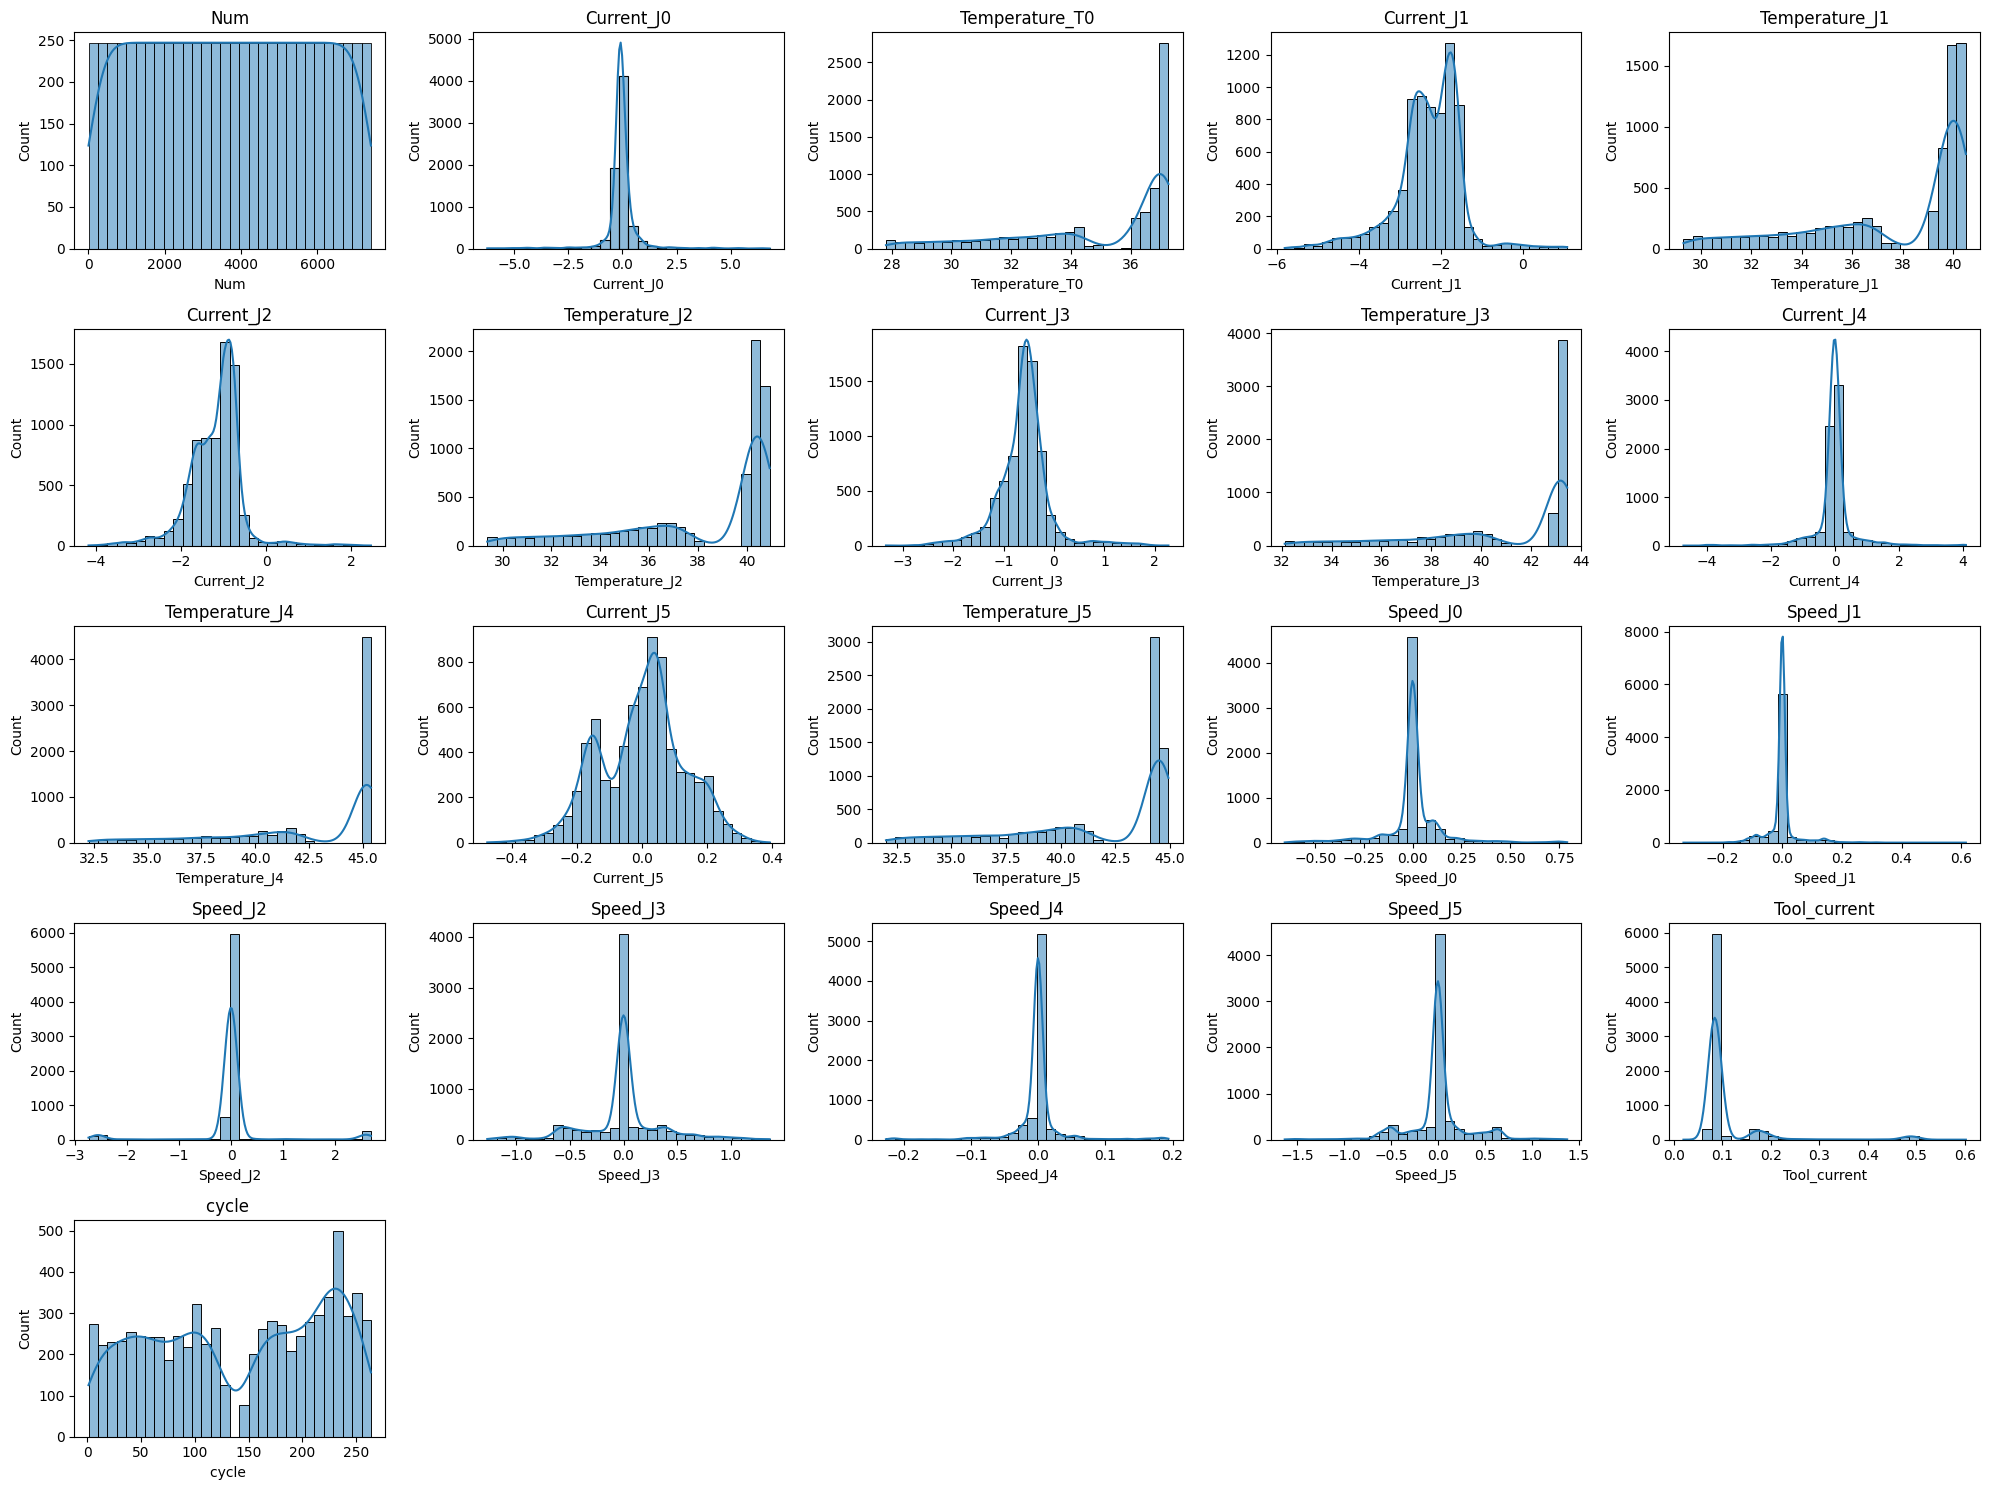

In [20]:
numerical_cols = df_lin.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df_knn[col], kde=True, bins=30)
    plt.title(col)
    plt.tight_layout()

plt.show()

**Currents (Current_J0 … Current_J5):**

Mostly centered around 0, with symmetric bell-like shapes robot joints normally operate near zero torque when idle.

Some joints (like J1, J2) show heavy tails   these joints experience higher torque variation, maybe because they handle more load.

J5 looks different the distribution is tighter and asymmetric  this joint may play a stabilizing role, not heavily loaded.

**Temperatures (Temperature_T0 … T5):**

Distributions are not Gaussian 

Some joints heat more than others (T2, T4, T5 have higher right tails).

**Speeds (Speed_J0 … J5):**

Extremely narrow, centered around 0.

Suggests most of the time, the robot joints are either stopped or moving very slowly.

Occasional values far from 0 indicate bursts of motion.

**Tool_current:**

Also tightly clustered, mostly around 0.1–0.2.

Rare higher values indicate the gripper is under load.



Robot_ProtectiveStop has nulls and it's an important feature and what is it's balance 
For the nulls I think Each cycle has many time-series rows until the task finishes.
so we can use the cycle to see through the task the robot had to make a protectivestop or not and use the mode of the protectivestop in the cycle to fill this nulls

In [21]:
df_lin['Robot_ProtectiveStop'] = df_lin.groupby('cycle ')['Robot_ProtectiveStop'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0)
).astype(int)


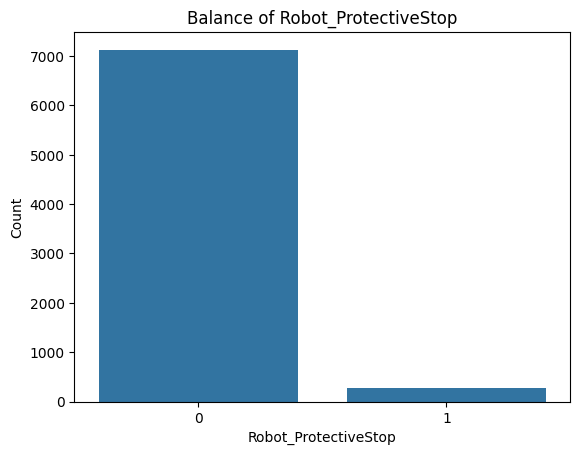

In [22]:
sns.countplot(x='Robot_ProtectiveStop', data=df_lin)
plt.title('Balance of Robot_ProtectiveStop')
plt.xlabel('Robot_ProtectiveStop')
plt.ylabel('Count')
plt.show()

In [23]:
protective_stop_counts = df_lin['Robot_ProtectiveStop'].value_counts(normalize=True) * 100
for value, pct in protective_stop_counts.items():
    print(f"Robot_ProtectiveStop = {value}: {pct:.2f}%")

Robot_ProtectiveStop = 0: 96.25%
Robot_ProtectiveStop = 1: 3.75%


Robot_Protectivestop is soo unbalanced to the zero class which means that the faults are the minority that makes the robot stops

In [24]:
skewness = df_lin[numerical_cols].skew().sort_values(ascending=False)
print(skewness)


Tool_current      3.896867
Speed_J1          2.001023
Current_J3        0.380321
Speed_J0          0.201226
Current_J4        0.126244
Speed_J2          0.083580
Current_J0        0.032587
Num               0.000000
Speed_J3         -0.002373
Speed_J4         -0.069078
Current_J2       -0.112908
Current_J5       -0.129849
cycle            -0.142791
Speed_J5         -0.199026
Current_J1       -0.533073
Temperature_T0   -1.012328
Temperature_J1   -1.018146
Temperature_J2   -1.053547
Temperature_J5   -1.090848
Temperature_J3   -1.148959
Temperature_J4   -1.176659
dtype: float64


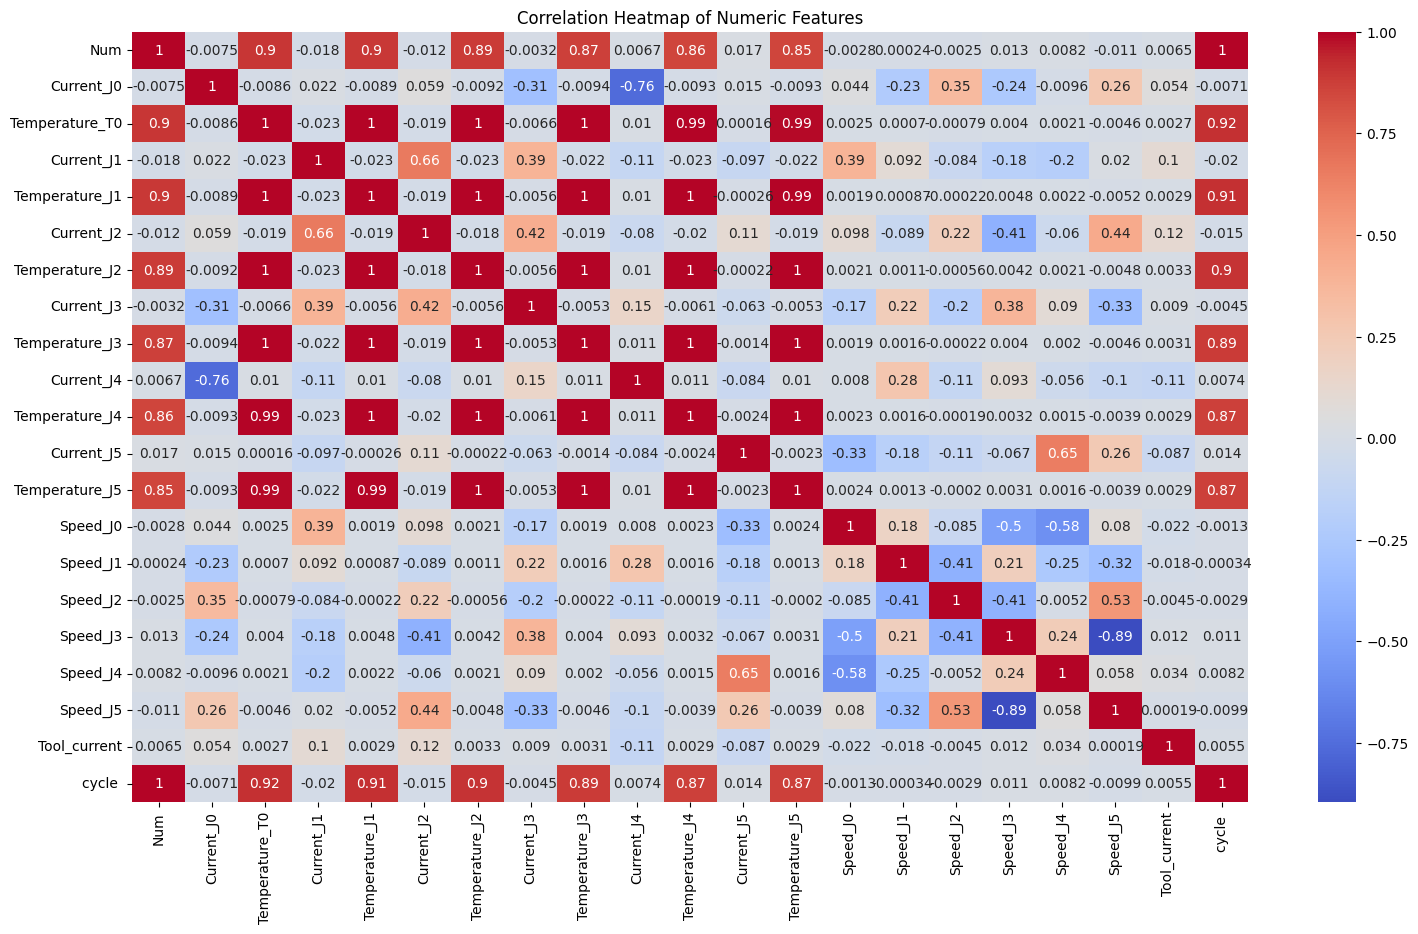

In [25]:
import seaborn as sns
plt.figure(figsize=(18,10))
sns.heatmap(df_lin[numerical_cols].corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Temperatures are  correlated (≈0.98–0.99) multicollinearity.

Current and Speed (same joint) are small-to-moderate (∼0.2–0.4)

Cross-joint speeds show  negative correlations (maybe some joints move opposite to others).

A few striking pairs (Current_J5 and  Speed_J4) and (Current_J4 and  Current_J0)


Text(0.5, 1.0, 'T0 vs T1 Correlation')

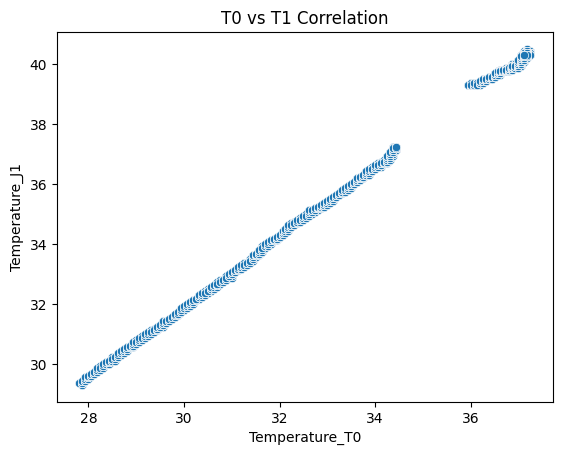

In [26]:
sns.scatterplot(x=df_lin['Temperature_T0'], y=df_lin['Temperature_J1'])
plt.title("T0 vs T1 Correlation")


Most of the tempretures are highly correlated they heat up together so when devolping a ML Model we can just use summarized Feature

In [27]:
curr_cols = [c for c in df_lin.columns if c.startswith('Current_J')]
spd_cols  = [c for c in df_lin.columns if c.startswith('Speed_J')]
tmp_cols  = [c for c in df_lin.columns if c.startswith('Temperature')]


df_lin['tool_spike'] = (df_lin['Tool_current'] > 0.30).astype(int) 
dt=1.0          
for j in range(6):
    c, s = f'Current_J{j}', f'Speed_J{j}'
    if c in df_lin and s in df_lin:
        df_lin[f'abs_{c}'] = df_lin[c].abs()
        df_lin[f'abs_{s}'] = df_lin[s].abs()
        df_lin[f'sudden{j}'] = df_lin[s].diff() / dt
        df_lin[f'power_J{j}'] = df_lin[c].abs() * df_lin[s].abs()    

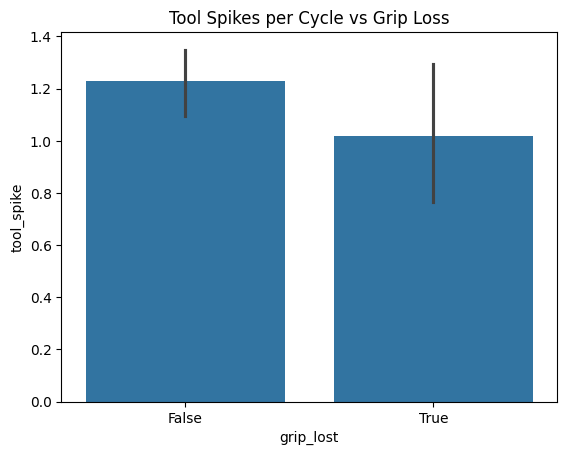

In [28]:
sns.barplot(x='grip_lost', y='tool_spike', 
            data=df_lin.groupby('cycle ')['tool_spike'].sum().reset_index()
                  .merge(df_lin.groupby('cycle ')['grip_lost'].max(), on='cycle '))
plt.title("Tool Spikes per Cycle vs Grip Loss")
plt.show()


cycles without grip loss had slightly more tool spikes on average.

But the error bars (vertical black lines = variability across cycles) overlap a lot  meaning the difference isn’t very strong.

Tool spikes alone don’t guarantee grip loss. Other features are probably also needed to detect grip problems.

C:\Users\FH\AppData\Local\Temp\ipykernel_23940\3155005208.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


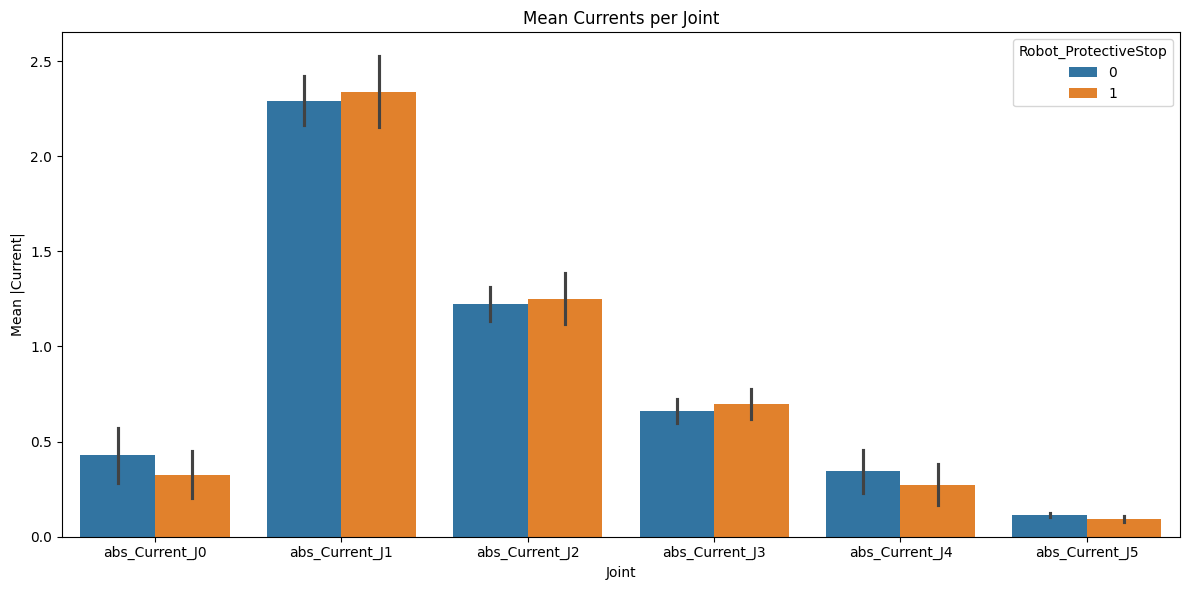

In [29]:

currents = [f'abs_Current_J{j}' for j in range(6) if f'abs_Current_J{j}' in df_lin.columns]


cycle_means = (
    df_lin.groupby('cycle ')  
        .agg({'Robot_ProtectiveStop':'max', **{c:'mean' for c in currents}})
        .reset_index()
)


long_curr = cycle_means.melt(
    id_vars=['cycle ','Robot_ProtectiveStop'],
    value_vars=currents,
    var_name='joint',
    value_name='abs_current_mean'
)


order = (
    long_curr.groupby('joint')['abs_current_mean']
    .median()
    .sort_values()
    .index
)


plt.figure(figsize=(12,6))  
sns.barplot(
    data=long_curr,
    x='joint', 
    y='abs_current_mean',
    hue='Robot_ProtectiveStop',
    ci='sd'
)
plt.title("Mean Currents per Joint")
plt.xlabel("Joint")
plt.ylabel("Mean |Current|")
plt.tight_layout()
plt.show()




### Mean Currents per Joint (Normal vs Stop)

- **J1** shows the highest mean current across all joints (~2.3), followed by **J2** and **J3 **.  
- In **stop cycles**, J1 and J2 currents are slightly higher than in normal cycles.  
- **J0, J4, J5** draw very low current overall and show little difference between stop and non-stop cycles.  
- Protective stops are strongly tied to higher currents in **load-bearing joints (J1 and J2)**.  
- This suggests that mechanical overload in these joints is a major factor in triggering stops.  
  


C:\Users\FH\AppData\Local\Temp\ipykernel_23940\1050377367.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


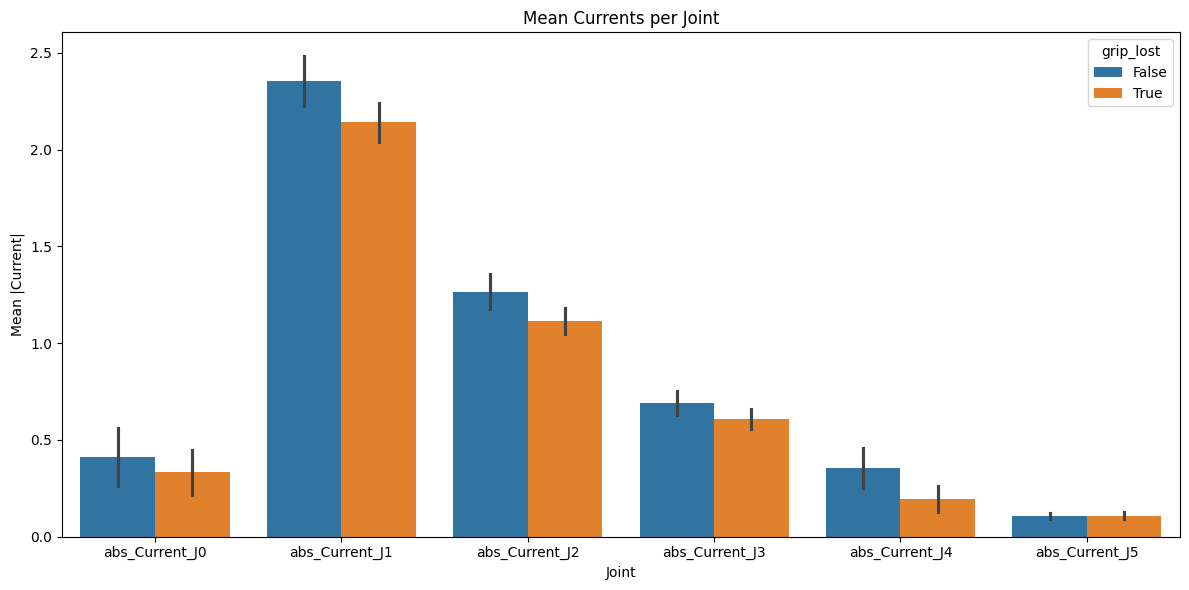

In [78]:

currents = [f'abs_Current_J{j}' for j in range(6) if f'abs_Current_J{j}' in df_lin.columns]


cycle_means = (
    df_lin.groupby('cycle ')  
        .agg({'grip_lost':'max', **{c:'mean' for c in currents}})
        .reset_index()
)


long_curr = cycle_means.melt(
    id_vars=['cycle ','grip_lost'],
    value_vars=currents,
    var_name='joint',
    value_name='abs_current_mean'
)


order = (
    long_curr.groupby('joint')['abs_current_mean']
    .median()
    .sort_values()
    .index
)


plt.figure(figsize=(12,6))  
sns.barplot(
    data=long_curr,
    x='joint', 
    y='abs_current_mean',
    hue='grip_lost',
    ci='sd'
)
plt.title("Mean Currents per Joint")
plt.xlabel("Joint")
plt.ylabel("Mean |Current|")
plt.tight_layout()
plt.show()




C:\Users\FH\AppData\Local\Temp\ipykernel_23940\651299322.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=long_speed, x='joint', y='abs_speed_mean',


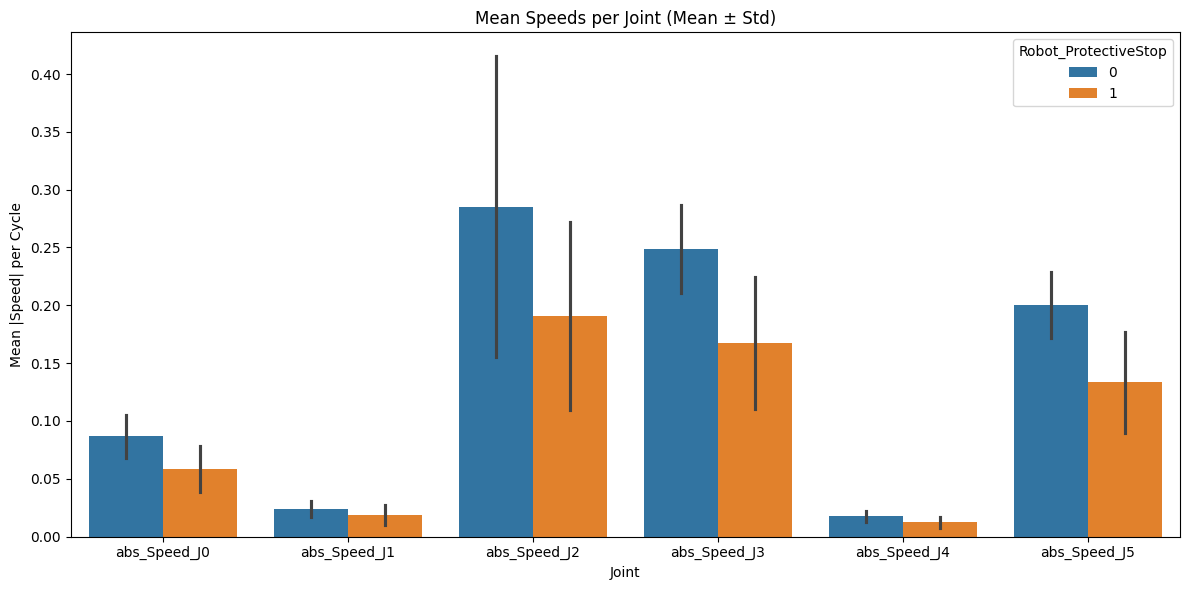

In [30]:
speed_cols = [f'abs_Speed_J{j}' for j in range(6) if f'abs_Speed_J{j}' in df_lin.columns]

cycle_speeds = (
    df_lin.groupby('cycle ')
          .agg({'Robot_ProtectiveStop':'max', **{c:'mean' for c in speed_cols}})
          .reset_index()
)

long_speed = cycle_speeds.melt(
    id_vars=['cycle ','Robot_ProtectiveStop'],
    value_vars=speed_cols,
    var_name='joint', value_name='abs_speed_mean'
)

plt.figure(figsize=(12,6))
sns.barplot(data=long_speed, x='joint', y='abs_speed_mean',
            hue='Robot_ProtectiveStop', ci='sd')
plt.title("Mean Speeds per Joint (Mean ± Std)")
plt.xlabel("Joint")
plt.ylabel("Mean |Speed| per Cycle")
plt.tight_layout()
plt.show()


### Mean Speeds per Joint (Normal vs Stop)

- J2, J3, and J5 joints have the highest average speeds across cycles.  
- In **stop cycles**, speeds are consistently lower compared to normal ones.  
- This suggests that **protective stops are not triggered by high-speed motions**.  
- Instead, the robot may be stopping during **slower but high-load movements**.  


C:\Users\FH\AppData\Local\Temp\ipykernel_23940\1459312949.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=long_speed, x='joint', y='abs_speed_mean',


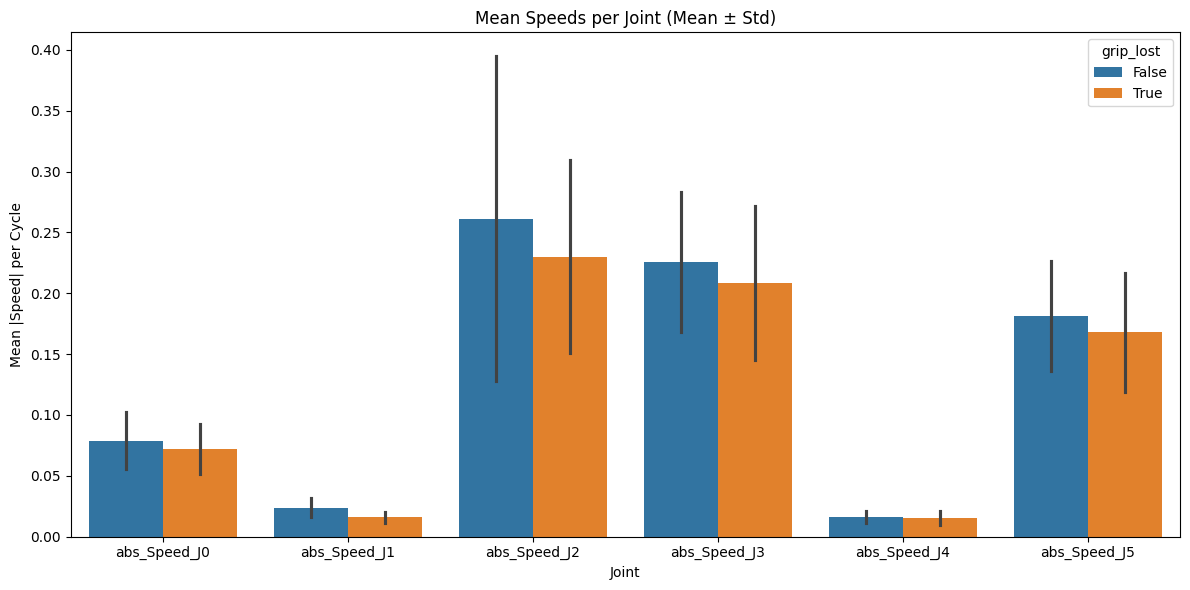

In [80]:
speed_cols = [f'abs_Speed_J{j}' for j in range(6) if f'abs_Speed_J{j}' in df_lin.columns]

cycle_speeds = (
    df_lin.groupby('cycle ')
          .agg({'grip_lost':'max', **{c:'mean' for c in speed_cols}})
          .reset_index()
)

long_speed = cycle_speeds.melt(
    id_vars=['cycle ','grip_lost'],
    value_vars=speed_cols,
    var_name='joint', value_name='abs_speed_mean'
)

plt.figure(figsize=(12,6))
sns.barplot(data=long_speed, x='joint', y='abs_speed_mean',
            hue='grip_lost', ci='sd')
plt.title("Mean Speeds per Joint (Mean ± Std)")
plt.xlabel("Joint")
plt.ylabel("Mean |Speed| per Cycle")
plt.tight_layout()
plt.show()


C:\Users\FH\AppData\Local\Temp\ipykernel_23940\250613231.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=long_jerk, x='joint', y='jerk_std',


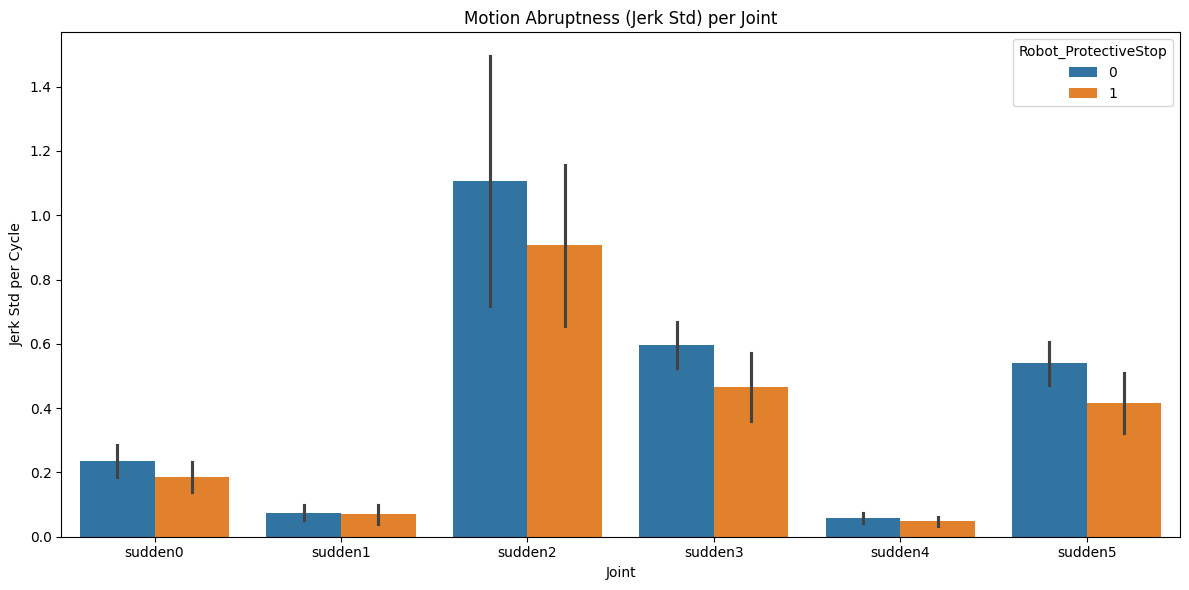

In [ ]:
sudden_cols = [f'sudden{j}' for j in range(6) if f'sudden{j}' in df_lin.columns]

cycle_jerk = (
    df_lin.groupby('cycle ')
          .agg({'Robot_ProtectiveStop':'max', **{c:'std' for c in sudden_cols}})
          .reset_index()
)

long_jerk = cycle_jerk.melt(
    id_vars=['cycle ','Robot_ProtectiveStop'],
    value_vars=sudden_cols,
    var_name='joint', value_name='jerk_std'
)

plt.figure(figsize=(12,6))
sns.barplot(data=long_jerk, x='joint', y='jerk_std',
            hue='Robot_ProtectiveStop', ci='sd')
plt.title("Motion Abruptness (Jerk Std) per Joint")
plt.xlabel("Joint")
plt.ylabel("Jerk Std per Cycle")
plt.tight_layout()
plt.show()


### Motion Abruptness (Jerk Std) per Joint

- J2 exhibits the highest jerk variability among all joints.  
- In **stop cycles**, jerk variability is slightly lower than in normal cycles.  
- This indicates that **protective stops are not caused by abrupt or jerky movements**.  
- The main factor behind stops is likely sustained load/overload rather than sudden motion.  


C:\Users\FH\AppData\Local\Temp\ipykernel_23940\2261440145.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=long_jerk, x='joint', y='jerk_std',


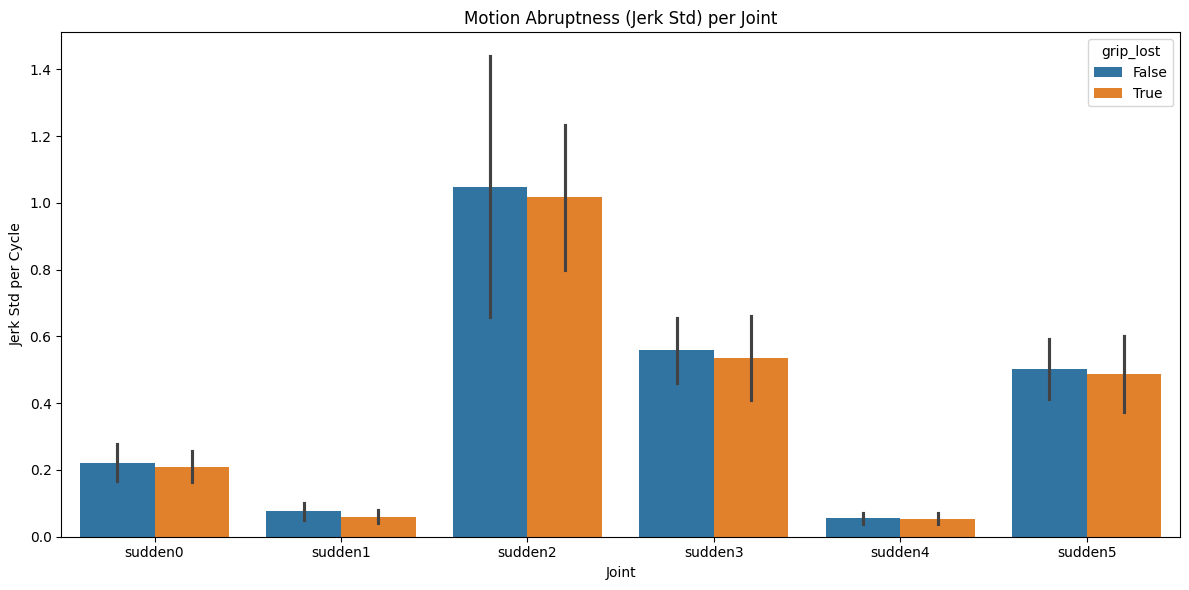

In [81]:
sudden_cols = [f'sudden{j}' for j in range(6) if f'sudden{j}' in df_lin.columns]

cycle_jerk = (
    df_lin.groupby('cycle ')
          .agg({'grip_lost':'max', **{c:'std' for c in sudden_cols}})
          .reset_index()
)

long_jerk = cycle_jerk.melt(
    id_vars=['cycle ','grip_lost'],
    value_vars=sudden_cols,
    var_name='joint', value_name='jerk_std'
)

plt.figure(figsize=(12,6))
sns.barplot(data=long_jerk, x='joint', y='jerk_std',
            hue='grip_lost', ci='sd')
plt.title("Motion Abruptness (Jerk Std) per Joint")
plt.xlabel("Joint")
plt.ylabel("Jerk Std per Cycle")
plt.tight_layout()
plt.show()


C:\Users\FH\AppData\Local\Temp\ipykernel_23940\2844836190.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=long_power, x='joint', y='total_power',


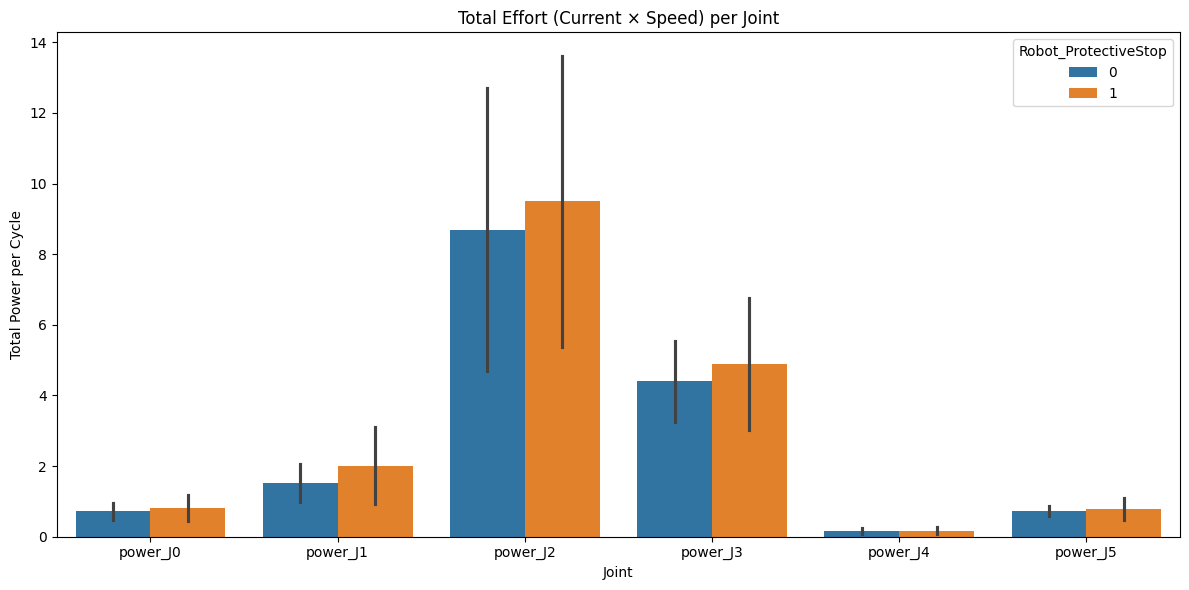

In [32]:
power_cols = [f'power_J{j}' for j in range(6) if f'power_J{j}' in df_lin.columns]

cycle_power = (
    df_lin.groupby('cycle ')
          .agg({'Robot_ProtectiveStop':'max', **{c:'sum' for c in power_cols}})
          .reset_index()
)

long_power = cycle_power.melt(
    id_vars=['cycle ','Robot_ProtectiveStop'],
    value_vars=power_cols,
    var_name='joint', value_name='total_power'
)

plt.figure(figsize=(12,6))
sns.barplot(data=long_power, x='joint', y='total_power',
            hue='Robot_ProtectiveStop', ci='sd')
plt.title("Total Effort (Current × Speed) per Joint")
plt.xlabel("Joint")
plt.ylabel("Total Power per Cycle")
plt.tight_layout()
plt.show()


### Total Effort (Power) per Joint

- J2 contributes the most to total power consumption, followed by J3 and J1.  
- In **stop cycles**, J2 and J3 show slightly higher power than in normal cycles.  
- This pattern suggests that **protective stops are linked to high workload/effort** in the main load-bearing joints.  
- Monitoring power usage could serve as an **early warning feature** for predicting stops.  


C:\Users\FH\AppData\Local\Temp\ipykernel_23940\1028380958.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=long_power, x='joint', y='total_power',


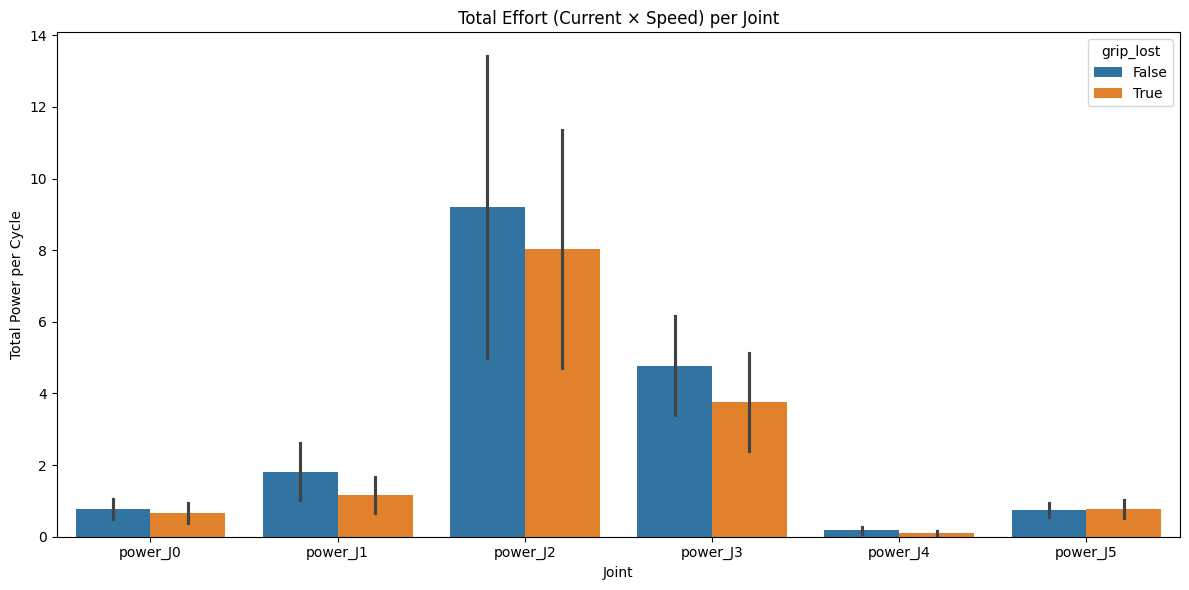

In [82]:
power_cols = [f'power_J{j}' for j in range(6) if f'power_J{j}' in df_lin.columns]

cycle_power = (
    df_lin.groupby('cycle ')
          .agg({'grip_lost':'max', **{c:'sum' for c in power_cols}})
          .reset_index()
)

long_power = cycle_power.melt(
    id_vars=['cycle ','grip_lost'],
    value_vars=power_cols,
    var_name='joint', value_name='total_power'
)

plt.figure(figsize=(12,6))
sns.barplot(data=long_power, x='joint', y='total_power',
            hue='grip_lost', ci='sd')
plt.title("Total Effort (Current × Speed) per Joint")
plt.xlabel("Joint")
plt.ylabel("Total Power per Cycle")
plt.tight_layout()
plt.show()


## General Insights from Speed, Jerk, and Power Analysis

- **Speed:** Protective stops occur at **lower speeds**, meaning stops are not caused by fast motions.  
- **Jerk:** Motion abruptness is **not higher** in stop cycles, ruling out jerky movements as the main cause.  
- **Power (Current × Speed):** Protective stops are strongly associated with **higher power usage** in load-bearing joints (J1, J2, J3).  
- **Key takeaway:** Protective stops are primarily related to **mechanical overload and high effort** in critical joints, not motion speed or abruptness.  
- **Practical value:** This guides feature selection when making the ML Model focus on **currents and power** rather than speeds or jerk.  


In [33]:
from scipy.signal import correlate

def lead_lag(x, y, max_lag=40):  
    x = x - x.mean(); y = y - y.mean()
    corr = correlate(x, y, mode='full')
    lags = np.arange(-len(x)+1, len(x))
    
    m = (lags >= -max_lag) & (lags <= max_lag)
    lag = lags[m][corr[m].argmax()]
    return lag 

lag_rows = []
for cyc, g in df_lin.groupby('cycle '):
    for j in range(6):
        c, s = f'Current_J{j}', f'Speed_J{j}'
        if c in g and s in g and g[c].notna().sum() and g[s].notna().sum():
            lag_rows.append({'cycle':cyc, 'joint':j, 'lag_samples': lead_lag(g[c], g[s])})
lags = pd.DataFrame(lag_rows)


C:\Users\FH\AppData\Local\Temp\ipykernel_23940\1212897475.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


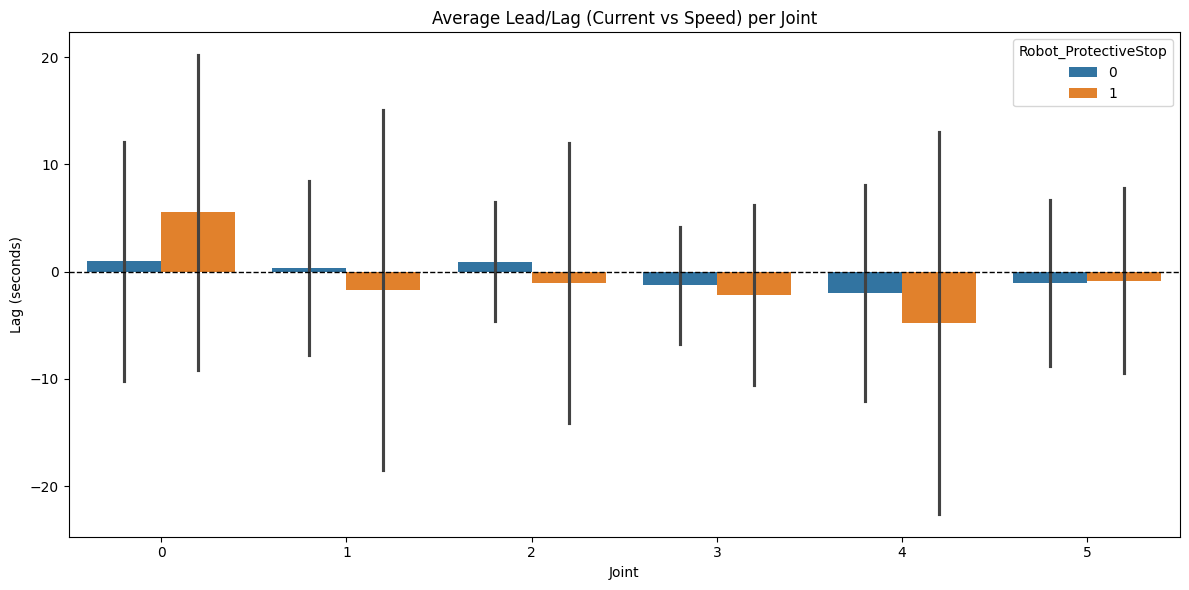

In [34]:
dt = 1.0
lags['lag_s'] = lags['lag_samples'] * dt


cycle_labels = df_lin.groupby('cycle ').agg(
    Robot_ProtectiveStop=('Robot_ProtectiveStop','max')
).reset_index()


lags_labeled = lags.merge(cycle_labels, left_on='cycle', right_on='cycle ', how='left')

plt.figure(figsize=(12,6))
sns.barplot(
    data=lags_labeled,
    x='joint', y='lag_s',
    hue='Robot_ProtectiveStop',
    ci='sd'  
)
plt.axhline(0, ls='--', c='k', lw=1)
plt.title("Average Lead/Lag (Current vs Speed) per Joint")
plt.xlabel("Joint")
plt.ylabel("Lag (seconds)")
plt.tight_layout()
plt.show()


### Lead/Lag Between Current and Speed
  
- **Positive lag** means current leads speed (motor effort comes before motion).  
- **Negative lag** means current lags speed (motion happens before current reacts).

**Insights:**
- Joint 0 shows strong **positive lag** during protective stops, meaning it demands current before motion under stress.  
- Other joints (like J4, J5) shift toward **negative lag** in stop cycles, suggesting delayed current response relative to movement.  
- Wide error bars indicate variability across cycles, reflecting unstable dynamics near fault conditions.  

This feature highlights how misalignment between current and speed can be an **early warning indicator** of protective stops.


In [35]:
asym = []
for cyc, g in df_lin.groupby('cycle '):
    for j in range(6):
        c, s = f'Current_J{j}', f'Speed_J{j}'
        pos = g.loc[g[s]>0, c].abs().mean()
        neg = g.loc[g[s]<0, c].abs().mean()
        asym.append({'cycle':cyc, 'joint':j, 'current_asym': (pos-neg)})
asym = pd.DataFrame(asym)


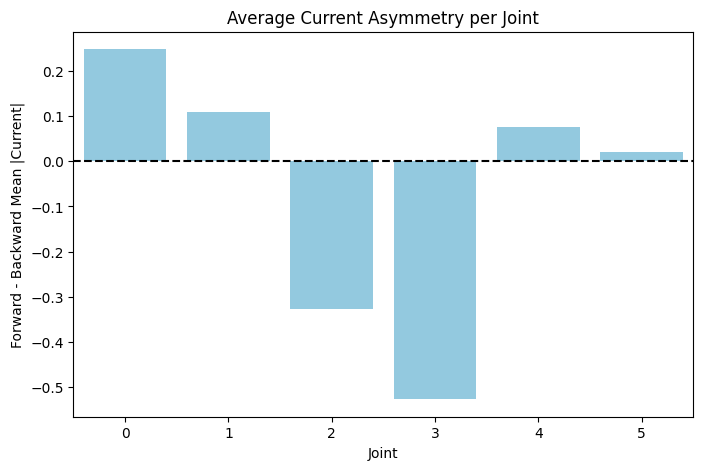

In [36]:
avg_asym = asym.groupby('joint')['current_asym'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=avg_asym, x='joint', y='current_asym', color="skyblue")
plt.axhline(0, ls='--', c='k')
plt.title("Average Current Asymmetry per Joint")
plt.ylabel("Forward - Backward Mean |Current|")
plt.xlabel("Joint")
plt.show()

### Current Asymmetry Analysis

- **Positive values** → Forward motion consumes more current.  
- **Negative values** → Backward motion consumes more current.  
- **Near zero** → Symmetric energy usage.

**Key Findings:**
- Joints **J0, J1, J4, J5** show near-symmetric or slightly forward-biased current consumption.  
- Joints **J2 and J3** exhibit **strong negative asymmetry**, indicating that backward motion consumes significantly more current than forward.  
- Such directional bias can reflect **mechanical load imbalance, gravity effects, or friction** in the joint mechanism.



In [37]:
therm = []
for cyc, g in df_lin.groupby('cycle '):
    w = sum(g[f'power_J{j}'] for j in range(6) if f'power_J{j}' in g)  
    for t in tmp_cols:
        r = g[[t]].join(w.rename('work'))
        therm.append({'cycle':cyc, 'sensor':t, 'temp_work_corr': r.corr().iloc[0,1]})
therm = pd.DataFrame(therm)


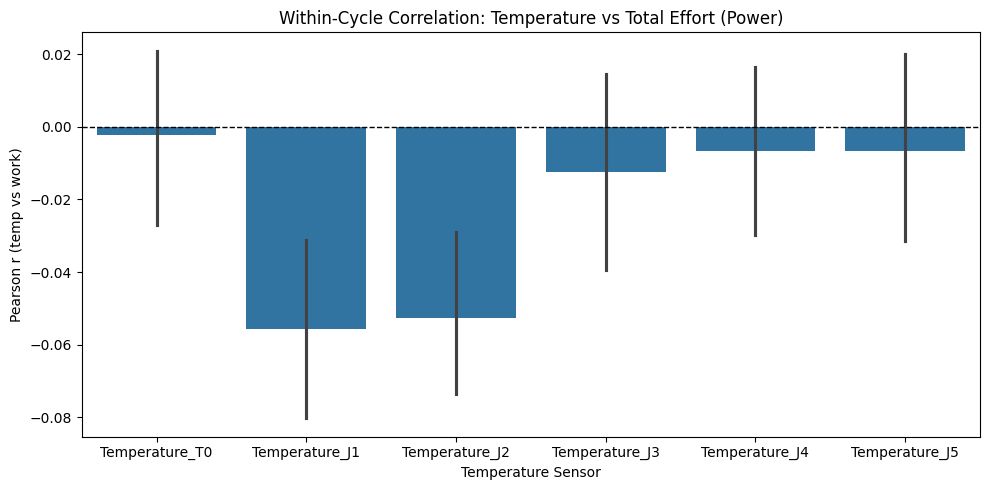

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(data=therm, x='sensor', y='temp_work_corr')
plt.axhline(0, ls='--', c='k', lw=1)
plt.title('Within-Cycle Correlation: Temperature vs Total Effort (Power)')
plt.ylabel('Pearson r (temp vs work)')
plt.xlabel('Temperature Sensor')
plt.tight_layout()
plt.show()


### Within Cycle Temperature Power Correlation

- This plot shows the **correlation between temperature and total effort (power) within the same cycle**.  
- The correlations are **very close to zero**, with some small negative values (e.g., J1, J2).  
- This means that **temperature does not respond instantly to changes in work** instead, heating builds up gradually over time.  
- The large error bars (overlapping zero) show that the relationship is **inconsistent across cycles**.  


In [39]:
def lagged_corr(temp, work, max_lag=10):
   
    results = {}
    for lag in range(0, max_lag+1):
        corr = temp.corr(work.shift(lag))
        results[lag] = corr
    return results


In [40]:
lagged_results = []

for cyc, g in df_lin.groupby('cycle '):

    work = sum(g[f'power_J{j}'] for j in range(6) if f'power_J{j}' in g)
    
    for t in tmp_cols: 
        lags = lagged_corr(g[t], work, max_lag=10)  
        for lag, corr in lags.items():
            lagged_results.append({
                'cycle': cyc,
                'sensor': t,
                'lag': lag,
                'corr': corr
            })

lagged_df = pd.DataFrame(lagged_results)


d:\envs\myvenv\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\envs\myvenv\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
d:\envs\myvenv\lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
d:\envs\myvenv\lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
d:\envs\myvenv\lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


           sensor  lag      corr
0  Temperature_J1    5  0.042384
1  Temperature_J2    2  0.059481
2  Temperature_J3    5  0.007817
3  Temperature_J4   10  0.012958
4  Temperature_J5   10  0.035288
5  Temperature_T0    1  0.202026


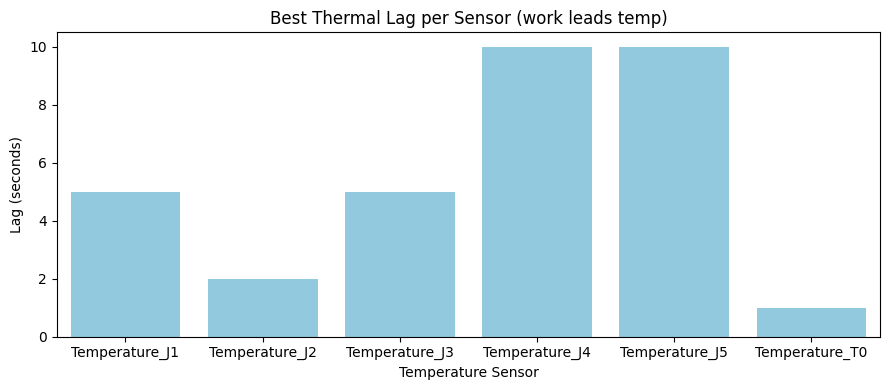

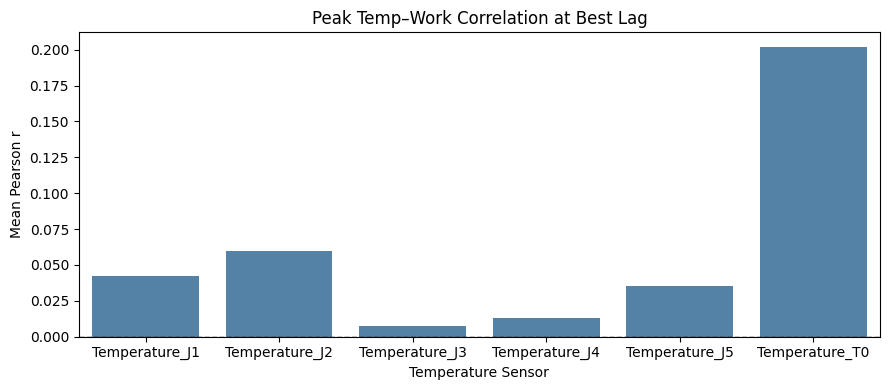

In [41]:

avg = (lagged_df
       .dropna(subset=['corr'])
       .groupby(['sensor','lag'])['corr']
       .mean()
       .reset_index())


idx = avg.groupby('sensor')['corr'].idxmax()
best = (avg.loc[idx]
            .sort_values('sensor')
            .reset_index(drop=True)
       )  

print(best)  


plt.figure(figsize=(9,4))
sns.barplot(data=best, x='sensor', y='lag', color='skyblue')
plt.title('Best Thermal Lag per Sensor (work leads temp)')
plt.ylabel('Lag (seconds)')
plt.xlabel('Temperature Sensor')
plt.tight_layout()
plt.show()


plt.figure(figsize=(9,4))
sns.barplot(data=best, x='sensor', y='corr', color='steelblue')
plt.axhline(0, ls='--', c='k', lw=1)
plt.title('Peak Temp–Work Correlation at Best Lag')
plt.ylabel('Mean Pearson r')
plt.xlabel('Temperature Sensor')
plt.tight_layout()
plt.show()


####  Best Thermal Lag per Sensor
- The bar plot shows the **time delay (lag)** in seconds where the correlation between *work* and *temperature* is strongest.  
- Example:
  - **Temperature_J2** responds fastest (~2s lag).  
  - **Temperature_J4 & J5** respond much slower (~10s lag).  
  - **Temperature_T0** has almost no lag (~1s), meaning it reacts very quickly.  

This indicates that different sensors heat up at different speeds, with some (J4, J5) being much slower to reflect workload.

#### Peak Temp Work Correlation at Best Lag
  - **Temperature_T0** shows the strongest correlation (~0.20), meaning it is the most reliable  for effort.  
  - Other sensors (J1–J5) show weaker correlations (<0.07), meaning their thermal response is less tied to immediate workload.  

These results highlight **T0 as the most sensitive sensor**, while joints J4/J5 are slow and less informative for direct workload monitoring.  


### Temperature–Power Correlation (KNN vs Linear Imputation)

- **With KNN imputation**:  
  Some plots showed apparent *heating effects* (temperature increasing after higher workload).  
  However, these maybe caused by **spikes introduced by KNN**, not real sensor behavior.
  ![KNN Correlation](Corr.png) 
  ![KNN Lag](lag.png)
  ![KNN Peak](peak.png)


- **With Linear interpolation**:  
  The correlations and lags are almost flat (near zero).  
  This indicates that **within a single cycle**, temperature does not respond significantly to workload.  
  Heating, if it exists, happens on a **longer timescale across many cycles**, not cycle-by-cycle.




C:\Users\FH\AppData\Local\Temp\ipykernel_23940\2538289066.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


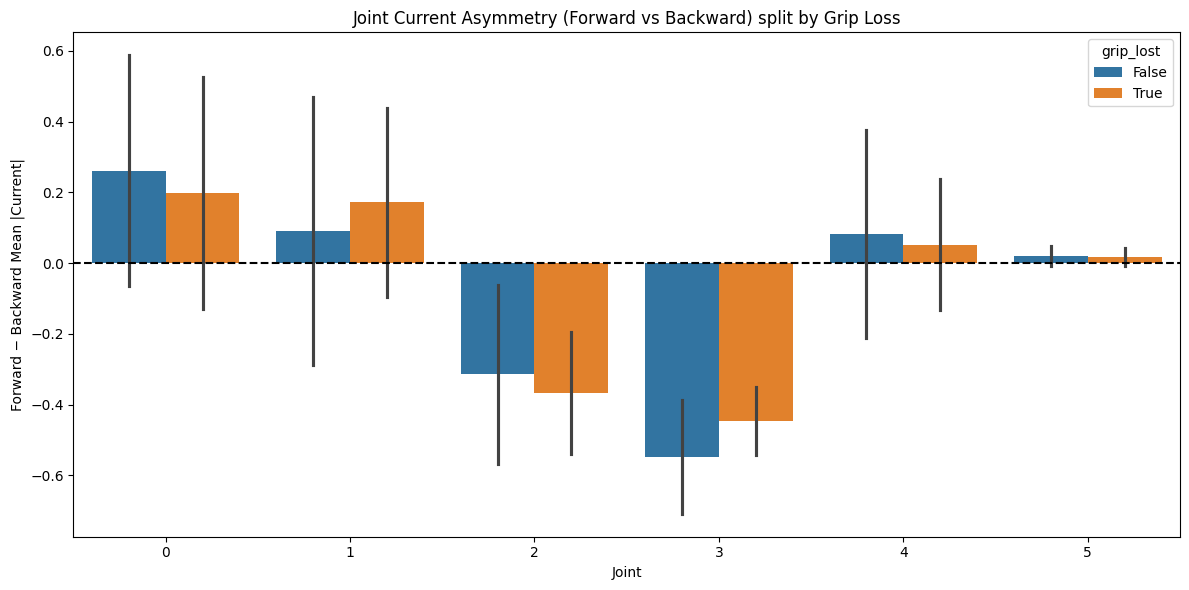

In [42]:

grip_labels = (
    df_lin.groupby('cycle ')
          .agg(grip_lost=('grip_lost', 'max'))   
          .reset_index()
)


asym_labeled = asym.merge(grip_labels, left_on='cycle', right_on='cycle ', how='left')


plt.figure(figsize=(12,6))
sns.barplot(
    data=asym_labeled,
    x='joint', y='current_asym',
    hue='grip_lost', ci='sd'
)
plt.axhline(0, color='black', linestyle='--')
plt.title("Joint Current Asymmetry (Forward vs Backward) split by Grip Loss")
plt.xlabel("Joint")
plt.ylabel("Forward − Backward Mean |Current|")
plt.tight_layout()
plt.show()


### Current Asymmetry (Forward vs Backward Motion)


**Key Findings:**
- **Joints 0 and 1**: Forward motion requires more current. This effect is stronger in cycles where grip was lost, suggesting additional strain in forward movement during failures.  
- **Joints 2 and 3**: Backward motion consumes more current, especially J3. Grip-loss cycles amplify this effect, indicating resistance when retracting the gripper.  
- **Joints 4 and 5**: Show little to no asymmetry, meaning they are less affected by grip conditions.  
- **Grip Loss Impact**: Cycles with grip loss consistently show **greater asymmetry**, highlighting it as a potential early warning indicator for anomalies.



# Some Time Series Analysis

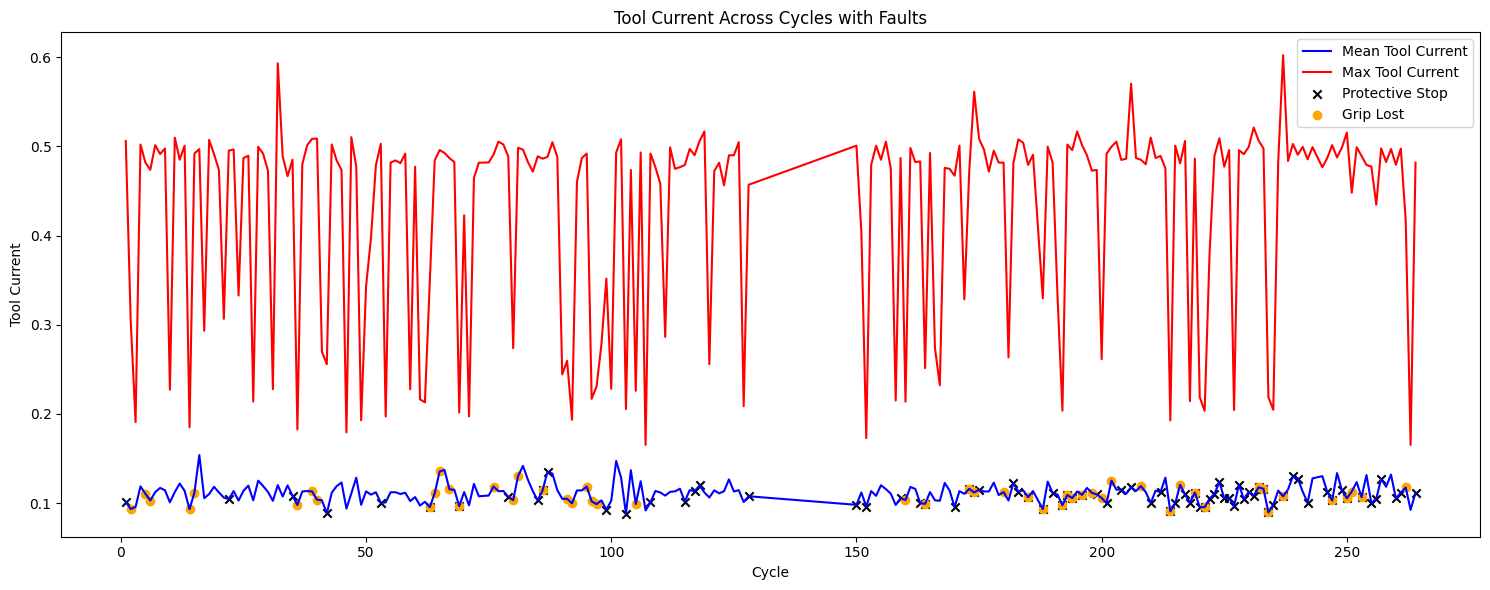

In [43]:
cycle_stats = df_lin.groupby('cycle ').agg(
    tool_current_mean=('Tool_current','mean'),
    tool_current_max=('Tool_current','max'),
    protective=('Robot_ProtectiveStop','max'),
    grip=('grip_lost','max')
).reset_index()

plt.figure(figsize=(15,6))
plt.plot(cycle_stats['cycle '], cycle_stats['tool_current_mean'], label="Mean Tool Current", color="blue")
plt.plot(cycle_stats['cycle '], cycle_stats['tool_current_max'], label="Max Tool Current", color="red")


plt.scatter(cycle_stats['cycle '][cycle_stats['protective']==1],
            cycle_stats['tool_current_mean'][cycle_stats['protective']==1], color="black", marker="x", label="Protective Stop")
plt.scatter(cycle_stats['cycle '][cycle_stats['grip']==1],
            cycle_stats['tool_current_mean'][cycle_stats['grip']==1], color="orange", marker="o", label="Grip Lost")

plt.title("Tool Current Across Cycles with Faults")
plt.xlabel("Cycle"); plt.ylabel("Tool Current")
plt.legend(); plt.tight_layout()
plt.show()


# Cycle-Level Tool Current Analysis

###  What is Plotted
- **Mean Tool Current (Blue Line)**  average load per cycle.  
- **Max Tool Current (Red Line)** peak load within each cycle.  
- **Protective Stop (Black X)** safety event triggered.  
- **Grip Lost (Orange O)**  gripper failed to hold the object.  

---

###  Key Insights
1. **Stable Mean Current**  
   - The robot’s baseline effort (blue) is consistent across cycles (~0.1).  
   - Suggests that normal operation load is stable.  

2. **Spikes in Max Current**  
   - Red peaks (~0.6) indicate cycles with sudden extra effort.  
     

3. **Protective Stop Correlation**  
   - Black X’s cluster near cycles with **high max current peaks**.  
   - Confirms that **protective stops are triggered by overloads**.  

4. **Grip Loss Independence**  
   - Orange O’s appear even when mean current is **normal or low**.  
   - Suggests grip failures are **not caused by overload**, but by mechanical gripping issues.  

5. **Different Fault Modes**  
   - **Protective Stops → Overload / high current demand.**  
   - **Grip Loss → End-effector or object handling failure.**  

 


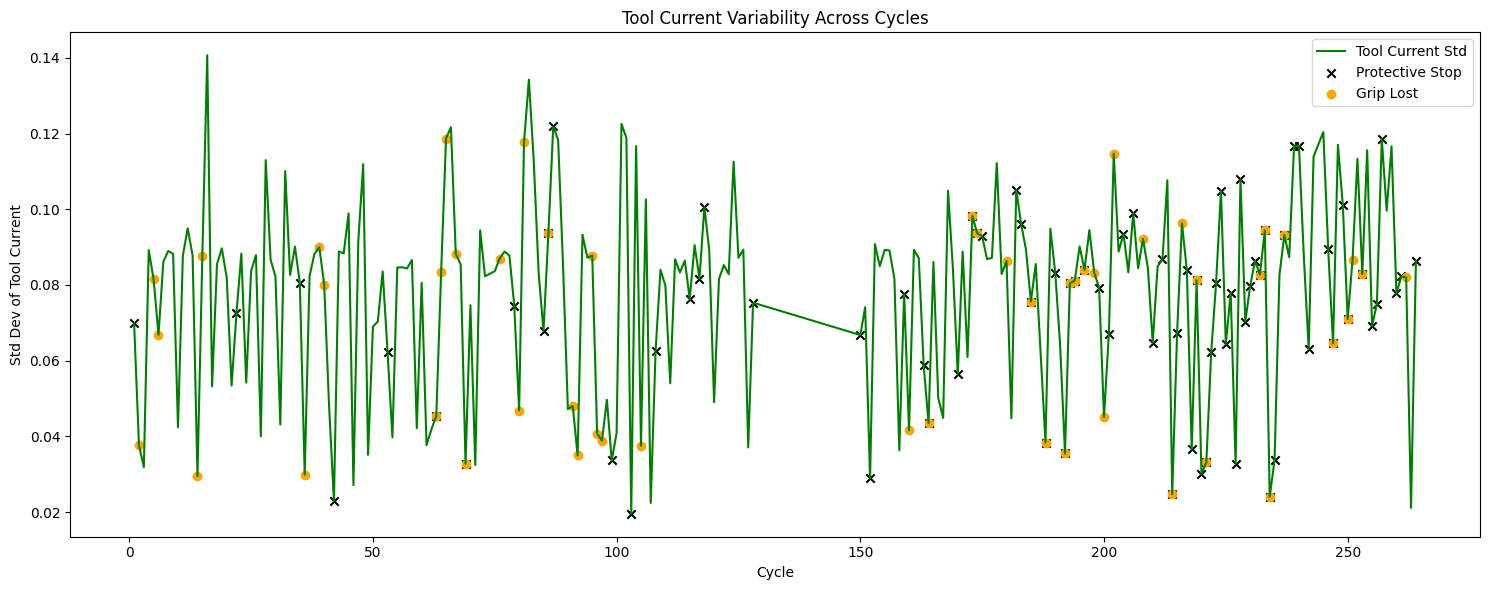

In [44]:
cycle_stats['tool_current_std'] = df_lin.groupby('cycle ')['Tool_current'].std().values

plt.figure(figsize=(15,6))
plt.plot(cycle_stats['cycle '], cycle_stats['tool_current_std'], label="Tool Current Std", color="green")
plt.scatter(cycle_stats['cycle '][cycle_stats['protective']==1],
            cycle_stats['tool_current_std'][cycle_stats['protective']==1], color="black", marker="x", label="Protective Stop")
plt.scatter(cycle_stats['cycle '][cycle_stats['grip']==1],
            cycle_stats['tool_current_std'][cycle_stats['grip']==1], color="orange", marker="o", label="Grip Lost")
plt.title("Tool Current Variability Across Cycles")
plt.xlabel("Cycle"); plt.ylabel("Std Dev of Tool Current")
plt.legend(); plt.tight_layout(); plt.show()


### Tool Current Variability Across Cycles

This plot shows the standard deviation of the tool current per cycle, with markers for **Protective Stops (x)** and **Grip Loss (o)**.

**Insights:**
- **High variability cycles (spikes in std dev):** Indicate unstable tool current. Many faults occur here.
- **Low variability cycles:** Usually stable operation, but protective stops still occur.
- **Fault correlation:** Both Protective Stops and Grip Loss events align with cycles of **increased current fluctuations**, suggesting that instability is a strong fault indicator.



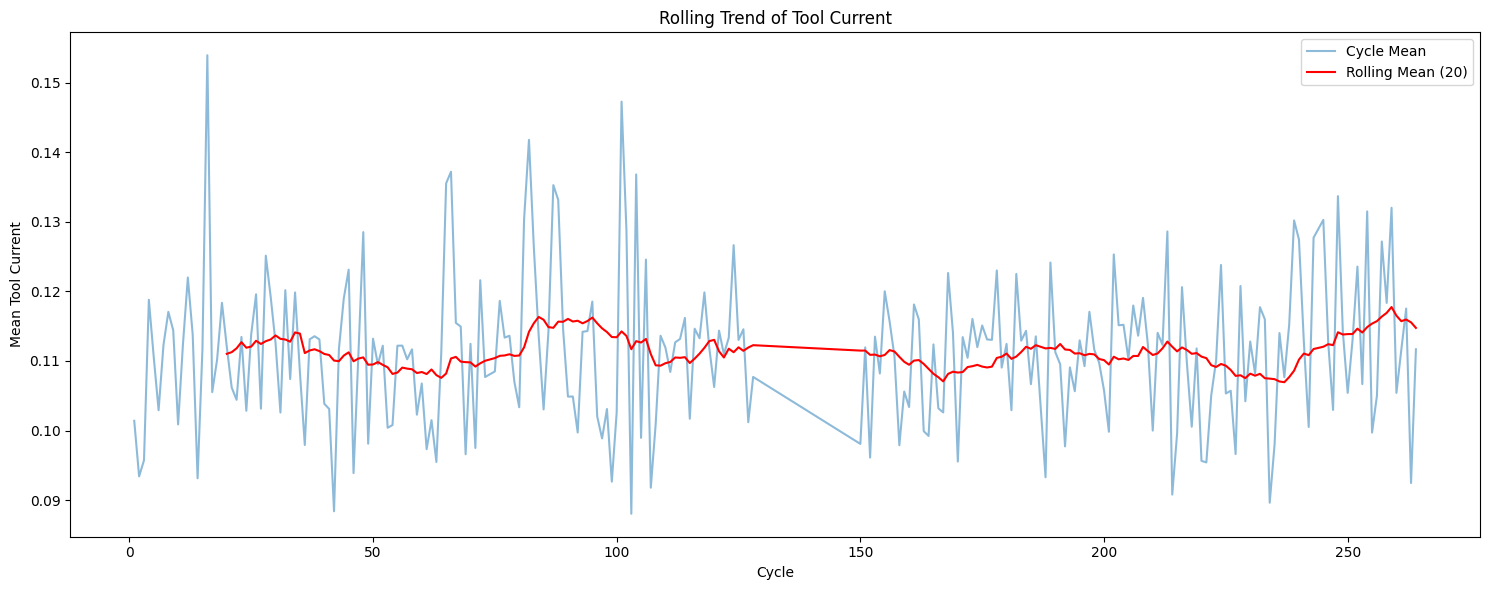

In [45]:
window = 20
cycle_stats['roll_mean'] = cycle_stats['tool_current_mean'].rolling(window).mean()

plt.figure(figsize=(15,6))
plt.plot(cycle_stats['cycle '], cycle_stats['tool_current_mean'], alpha=0.5, label="Cycle Mean")
plt.plot(cycle_stats['cycle '], cycle_stats['roll_mean'], color="red", label=f"Rolling Mean ({window})")
plt.title("Rolling Trend of Tool Current")
plt.xlabel("Cycle");
plt.ylabel("Mean Tool Current")
plt.legend();
plt.tight_layout();
plt.show()


### Rolling Trend of Tool Current

The plot shows the mean tool current per cycle (blue) and its rolling mean over a 20-cycle window (red).

- **Blue line (Cycle Mean):** Reflects the average tool current at each cycle. It is noisy and shows short-term fluctuations.  
- **Red line (Rolling Mean):** A smoothed curve that averages over 20 cycles, highlighting the long-term trend and filtering out noise.  

**Insights:**  
- The rolling mean is relatively flat, indicating that the tool’s energy usage (current demand) is stable across cycles.  
- Small local variations in the red line.  
- No clear upward or downward drift is observed, suggesting no strong evidence of increasing current or loss of grip/force (decreasing current) over time.  


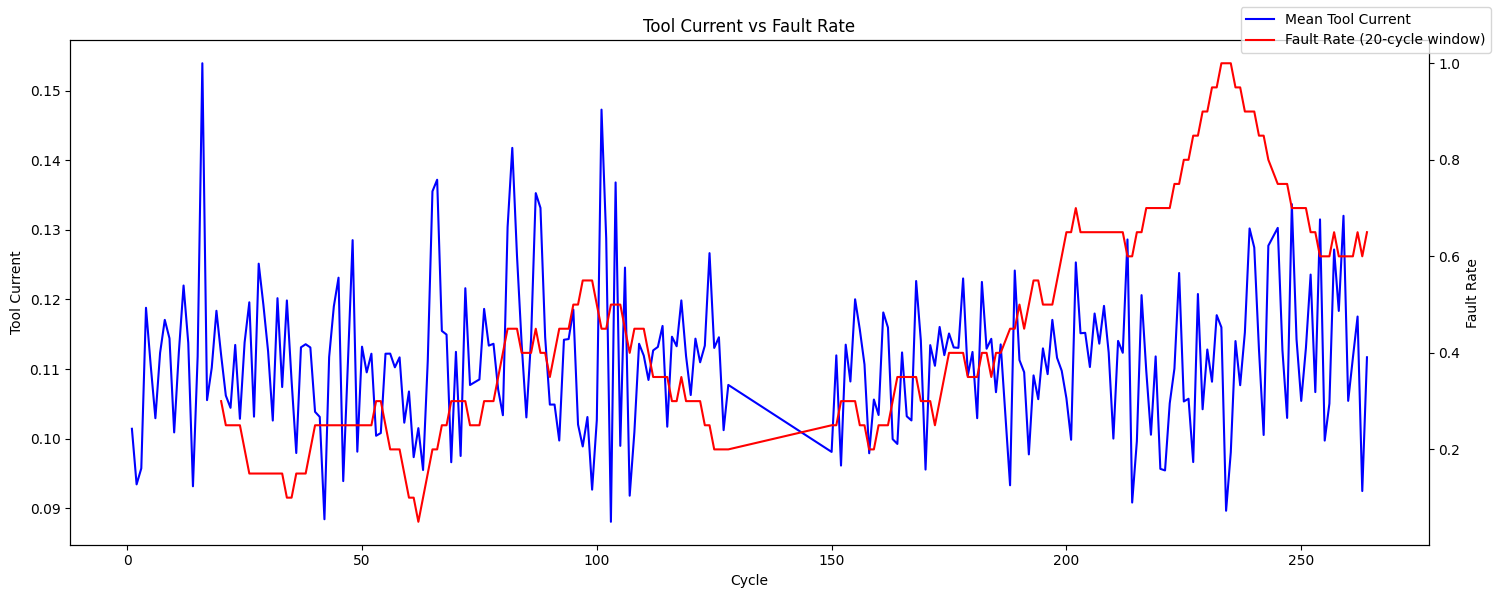

In [46]:
cycle_stats['fault'] = cycle_stats['protective'] | cycle_stats['grip']
fault_rate = cycle_stats['fault'].rolling(20).mean()

fig, ax1 = plt.subplots(figsize=(15,6))
ax1.plot(cycle_stats['cycle '], cycle_stats['tool_current_mean'], color="blue", label="Mean Tool Current")
ax2 = ax1.twinx()
ax2.plot(cycle_stats['cycle '], fault_rate, color="red", label="Fault Rate (20-cycle window)")

ax1.set_xlabel("Cycle")
ax1.set_ylabel("Tool Current")
ax2.set_ylabel("Fault Rate")
plt.title("Tool Current vs Fault Rate")
fig.legend(loc="upper right")
plt.tight_layout(); plt.show()


### Tool Current vs Fault Rate (Time Series Analysis)

This plot compares the **mean tool current per cycle**  with the **rolling fault rate** (smoothed over a 20-cycle window).  

**Key insights:**
- Periods of **high fault rate** can be spotted even when tool current stays stable.
- If **current increases alongside fault rate**, it suggests the tool is under higher stress, contributing to failures.
- Around **cycles 180–240**, fault rates increase sharply while tool current remains stable, highlighting fault causes unrelated to current draw.



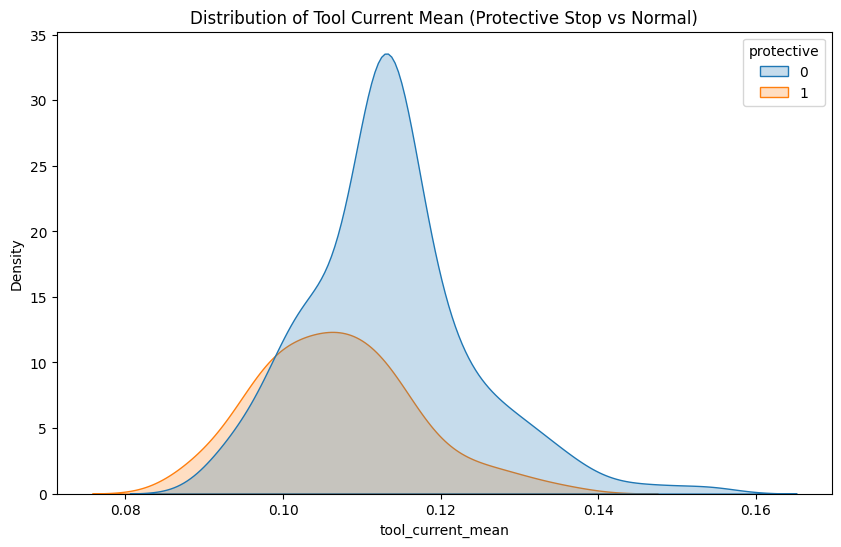

In [47]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=cycle_stats, x='tool_current_mean', hue='protective', fill=True)
plt.title("Distribution of Tool Current Mean (Protective Stop vs Normal)")
plt.show()


### Distribution of Tool Current Mean (Protective Stop vs Normal)

The KDE plot compares the distribution of **mean tool current per cycle** between:
- **Normal cycles (0):** More concentrated around ~0.11 .
- **Protective stop cycles (1):** Slightly shifted, broader distribution.

**Insights:**
- Protective stops are **not strongly tied to very high  tool current** but may happen under slightly lower or more variable tool current conditions.
- This indicates that protective stops could be triggered by **other factors** rather than tool current load alone.


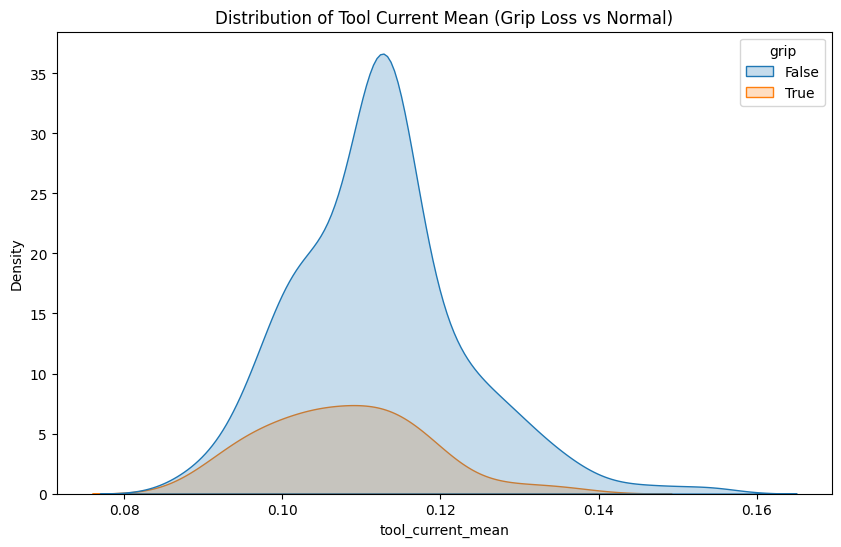

In [48]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=cycle_stats, x='tool_current_mean', hue='grip', fill=True)
plt.title("Distribution of Tool Current Mean (Grip Loss vs Normal)")
plt.show()


### Distribution of Tool Current Mean (Grip Loss vs Normal)

The KDE plot compares **mean tool current per cycle** between:
- **Normal cycles (False):** Centered around ~0.11 with a strong peak.
- **Grip loss cycles (True):** Overlapping heavily with normal cycles, also centered near ~0.11.

**Insights:**
- Grip loss does **not appear strongly correlated with mean tool current**.
- This suggests that other features  are likely more important in explaining grip loss events.


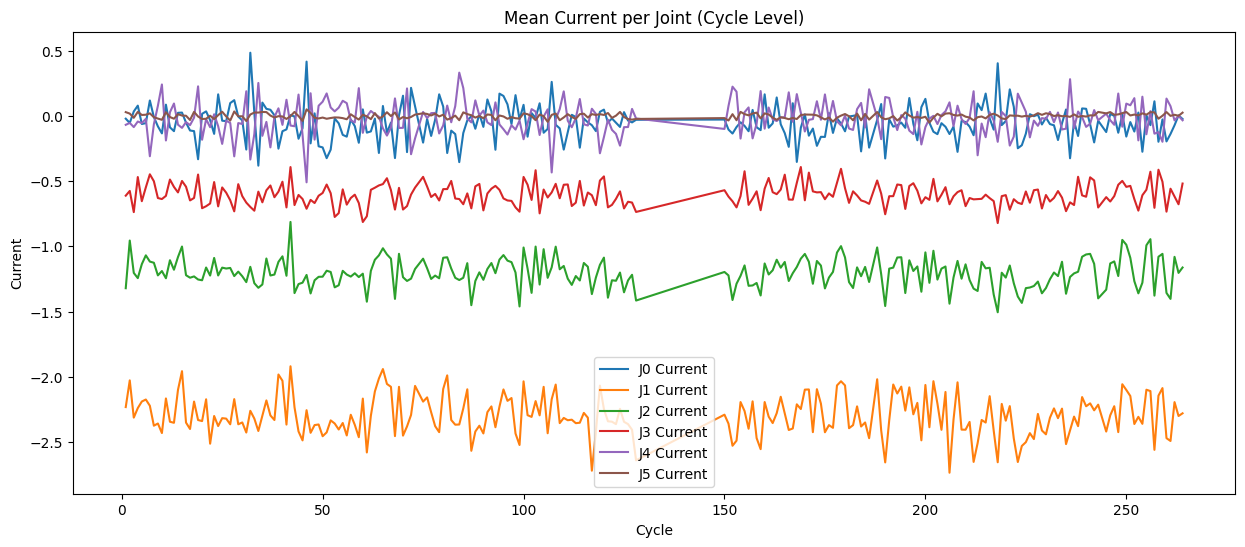

In [49]:
plt.figure(figsize=(15,6))
for j in range(6):
    plt.plot(cycle_stats['cycle '], df_lin.groupby('cycle ')[f'Current_J{j}'].mean(),
             label=f'J{j} Current')
plt.legend(); plt.title("Mean Current per Joint (Cycle Level)")
plt.xlabel("Cycle"); plt.ylabel("Current")
plt.show()


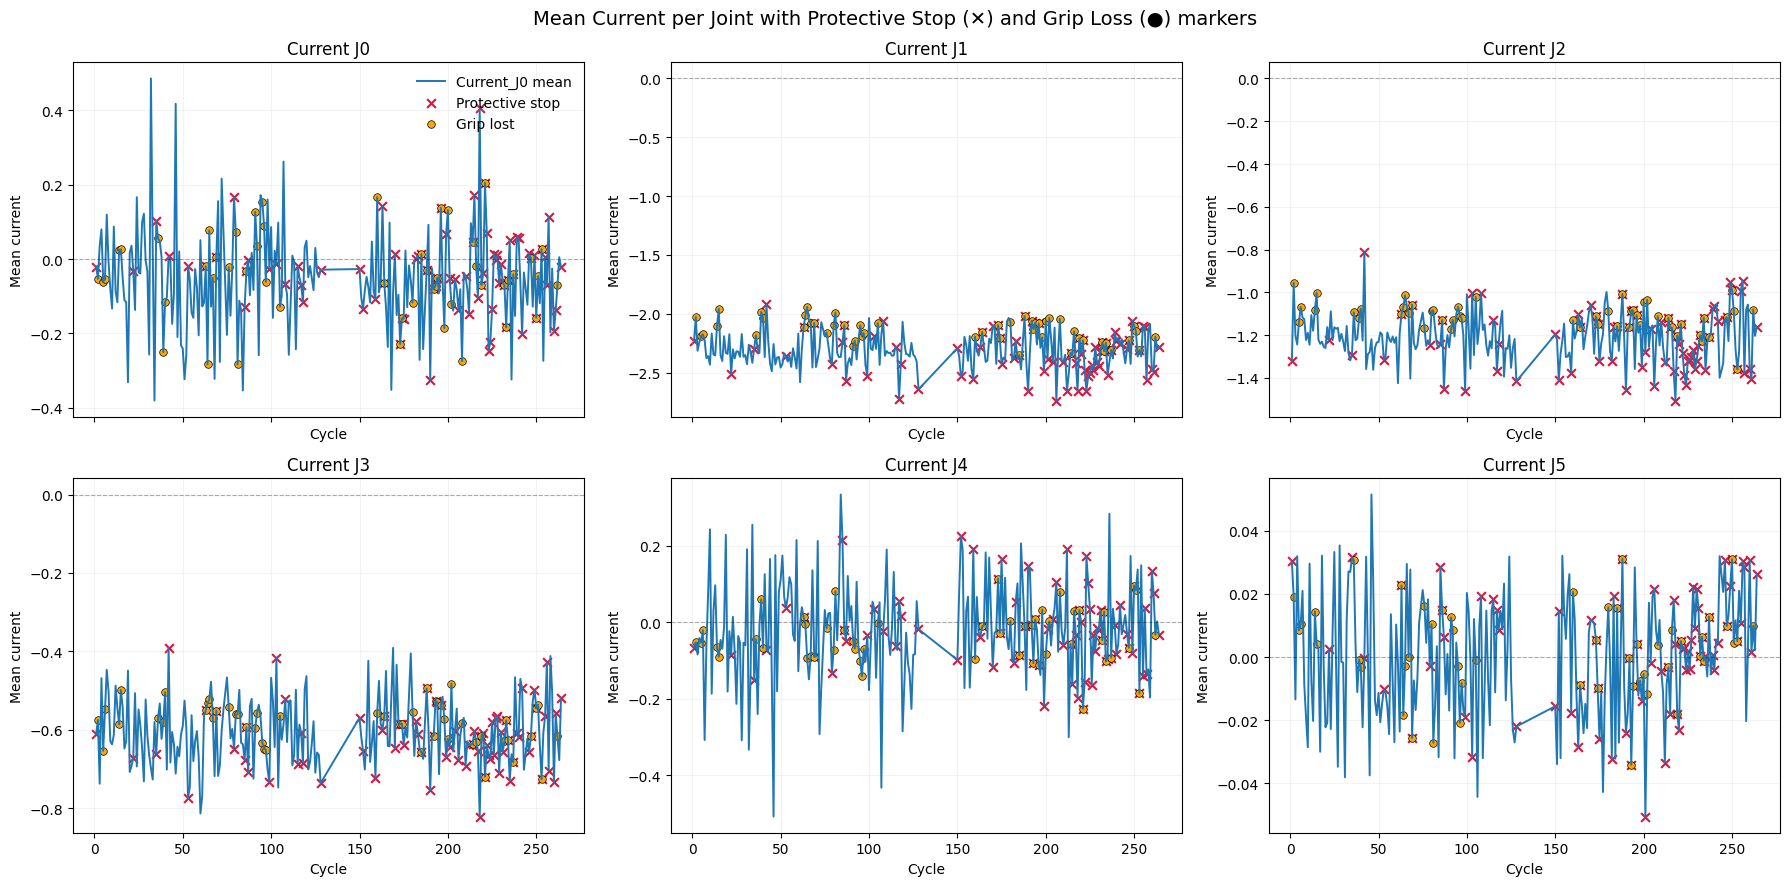

In [ ]:

joint_cols = [f"Current_J{j}" for j in range(6) if f"Current_J{j}" in df_lin.columns]


agg_dict = {c: "mean" for c in joint_cols}
agg_dict.update({
    "Robot_ProtectiveStop": "max",
    "grip_lost": "max"
})
cycle_means = (df_lin
               .groupby('cycle ')
               .agg(agg_dict)
               .reset_index()
               .rename(columns={'cycle ': 'cycle'}))


prot_mask = cycle_means["Robot_ProtectiveStop"].astype(bool)
grip_mask = cycle_means["grip_lost"].astype(bool)


fig, axes = plt.subplots(2, 3, figsize=(18, 9), sharex=True)
axes = axes.ravel()

for j, ax in enumerate(axes[:len(joint_cols)]):
    col = joint_cols[j]
    y = cycle_means[col].values
    x = cycle_means["cycle"].values

    
    ax.plot(x, y, lw=1.4, label=f"{col} mean")

    x_prot = x[prot_mask.values]
    y_prot = cycle_means.loc[prot_mask, col].values
    ax.scatter(x_prot, y_prot, color="crimson", marker="x", s=40, label="Protective stop")

   
    x_grip = x[grip_mask.values]
    y_grip = cycle_means.loc[grip_mask, col].values
    ax.scatter(x_grip, y_grip, color="orange", edgecolor="black",
               linewidth=0.5, s=30, label="Grip lost")

   
    ax.axhline(0, color="k", lw=0.8, alpha=0.3, ls="--")
    ax.set_title(col.replace("_", " "))
    ax.set_ylabel("Mean current")
    ax.grid(alpha=0.15)


handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels, loc="upper right", frameon=False)

for ax in axes:
    ax.set_xlabel("Cycle")

fig.suptitle("Mean Current per Joint with Protective Stop and Grip Loss ", y=0.98, fontsize=14)
plt.tight_layout()
plt.show()


### Mean Current per Joint with Faults

**Key insights:**
- **J1 and J2 currents** are consistently lower (around –2 to –1), and they show a **higher concentration of protective stop and grip loss events**, suggesting these joints are under the heaviest load and more prone to triggering faults.
- **J0, J4, and J5** currents fluctuate closer to 0 with more variability but fewer clustered faults, indicating less consistent stress compared to J1/J2.
- **J3** shows moderate negative currents (around –0.6) with scattered faults, making it less critical than J1/J2 but not negligible.
- The clustering of events at certain cycles across multiple joints suggests that **system-level conditions (not just one joint)** may contribute to protective stops or grip loss.



In [70]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)



numeric_cols = [
    'Current_J0','Current_J1','Current_J2','Current_J3','Current_J4','Current_J5',
    'Temperature_T0','Temperature_J1','Temperature_J2','Temperature_J3','Temperature_J4','Temperature_J5',
    'Speed_J0','Speed_J1','Speed_J2','Speed_J3','Speed_J4','Speed_J5',
    'Tool_current'
]
outlier_flags = df_lin[numeric_cols].apply(detect_outliers_iqr)


df_lin['outlier_count'] = outlier_flags.sum(axis=1)




In [71]:
outlier_counts = {c: len(outlier_flags[c]) for c in outlier_flags}
pd.Series(outlier_counts).sort_values(ascending=False)


Current_J0        7409
Temperature_J4    7409
Speed_J5          7409
Speed_J4          7409
Speed_J3          7409
Speed_J2          7409
Speed_J1          7409
Speed_J0          7409
Temperature_J5    7409
Temperature_J3    7409
Current_J1        7409
Temperature_J2    7409
Temperature_J1    7409
Temperature_T0    7409
Current_J5        7409
Current_J4        7409
Current_J3        7409
Current_J2        7409
Tool_current      7409
dtype: int64

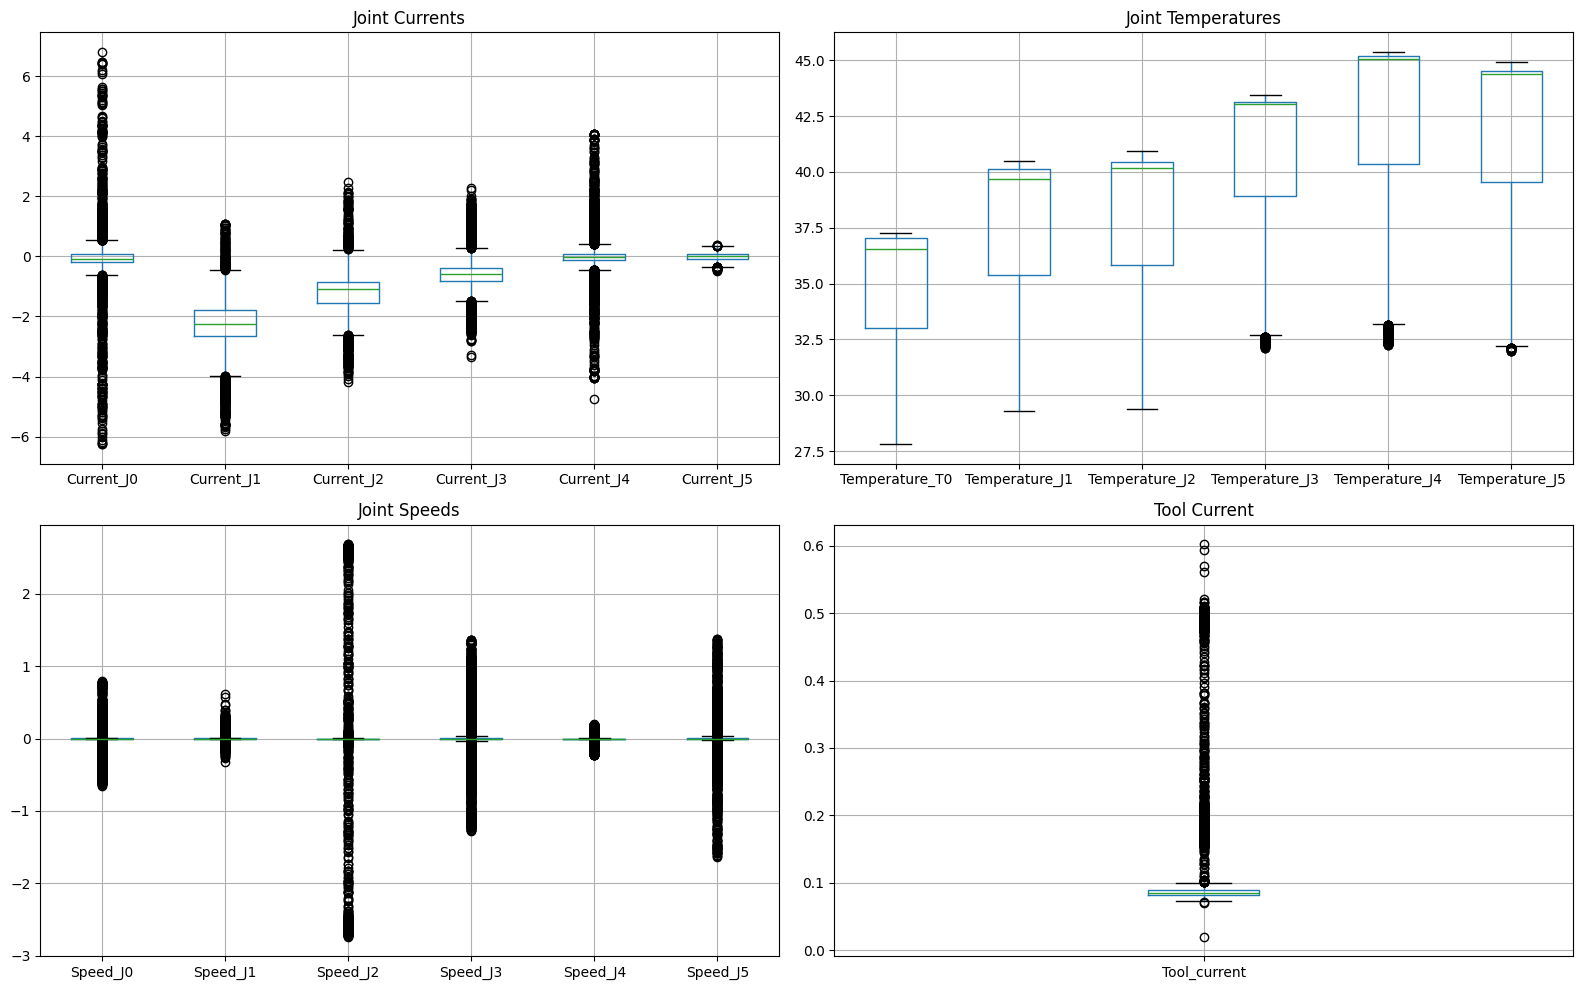

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))


df_lin[['Current_J0','Current_J1','Current_J2','Current_J3','Current_J4','Current_J5']].boxplot(ax=axes[0,0])
axes[0,0].set_title("Joint Currents")


df_lin[['Temperature_T0','Temperature_J1','Temperature_J2','Temperature_J3','Temperature_J4','Temperature_J5']].boxplot(ax=axes[0,1])
axes[0,1].set_title("Joint Temperatures")


df_lin[['Speed_J0','Speed_J1','Speed_J2','Speed_J3','Speed_J4','Speed_J5']].boxplot(ax=axes[1,0])
axes[1,0].set_title("Joint Speeds")


df_lin[['Tool_current']].boxplot(ax=axes[1,1])
axes[1,1].set_title("Tool Current")

plt.tight_layout()
plt.show()


## Outlier Analysis from Boxplots



### Key Insights:
- **Joint Currents (J0–J5):**
  - Strong presence of outliers, especially in J0, J1, J2, and J4.
  - Negative currents dominate, which may indicate opposing torque or sudden load changes.
  - Suggests potential instability in joint behavior during certain cycles.

- **Joint Temperatures (T0–T5):**
  - Generally stable between 30–45 °C.
  - Some abnormal sudden drops (<30 °C), likely sensor glitches or unrealistic readings.

- **Joint Speeds (J0–J5):**
  - Mostly around zero, but with frequent spikes in both directions.
  - Indicates abnormal accelerations, possibly tied to grip loss or protective stops.

- **Tool Current:**
  - Normally very low (~0.1).
  - Contains many sharp spikes (>0.5).
  



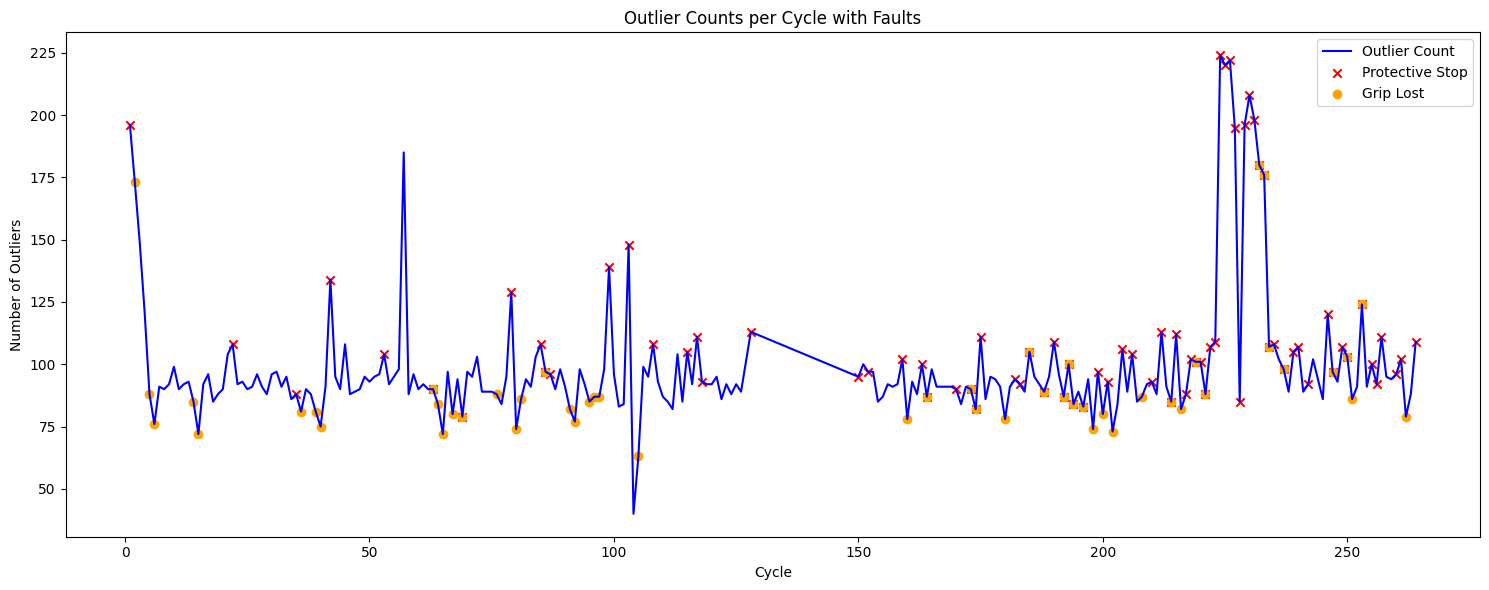

In [74]:
cycle_outliers = df_lin.groupby('cycle ').agg(
    total_outliers=('outlier_count', 'sum'),
    protective=('Robot_ProtectiveStop', 'max'),
    grip=('grip_lost', 'max')
).reset_index()

plt.figure(figsize=(15,6))
plt.plot(cycle_outliers['cycle '], cycle_outliers['total_outliers'], label="Outlier Count", color="blue")
plt.scatter(cycle_outliers['cycle '][cycle_outliers['protective']==1],
            cycle_outliers['total_outliers'][cycle_outliers['protective']==1],
            color="red", marker="x", label="Protective Stop")
plt.scatter(cycle_outliers['cycle '][cycle_outliers['grip']==1],
            cycle_outliers['total_outliers'][cycle_outliers['grip']==1],
            color="orange", marker="o", label="Grip Lost")

plt.title("Outlier Counts per Cycle with Faults")
plt.xlabel("Cycle"); plt.ylabel("Number of Outliers")
plt.legend(); plt.tight_layout()
plt.show()


In [77]:
fault_cycles = df_lin[(df_lin['Robot_ProtectiveStop']==1) | (df_lin['grip_lost']==1)]['cycle '].unique()

outlier_during_faults = outlier_flags.loc[df_lin['cycle '].isin(fault_cycles)].sum().sort_values(ascending=False)
print(outlier_during_faults.head(12))


Speed_J3        1644
Speed_J0        1545
Speed_J4        1531
Speed_J5        1503
Speed_J1        1452
Speed_J2        1304
Current_J4       533
Tool_current     509
Current_J0       430
Current_J3       273
Current_J1       223
Current_J2       178
dtype: int64


## Outlier–Fault Investigation



### Key Findings:
1. **Outlier Count per Cycle:**
   - Cycles with fault events (Protective Stop or Grip Loss ) tend to have **much higher outlier counts**.
   - Notable spikes around certain cycles  strongly align with multiple faults.

2. **Top Outlier-Contributing Features:**
   - The majority of anomalies come from **joint speeds**.
   - Smaller but important contributions from **joint currents**  and **Tool Current**.

3. **Interpretation:**
   - Fault cycles are often preceded by **irregular or extreme joint speeds**.
   - Currents and tool current also show anomalies, but less frequently compared to speeds.
   - This suggests that **speed instabilities are strong indicators of fault conditions**.




In [93]:
features = df_lin[numeric_cols]  
features_scaled = StandardScaler().fit_transform(features)

In [94]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.05, random_state=42)
df_lin['iso_pred'] = iso.fit_predict(features_scaled) 
df_lin['iso_score'] = iso.decision_function(features_scaled)

In [95]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.5, min_samples=10)  
df_lin['dbscan_cluster'] = db.fit_predict(features_scaled) 

In [96]:
cycle_anoms = df_lin.groupby('cycle ').agg(
    iso_anom=('iso_pred', lambda x: (x==-1).sum()),
    dbscan_anom=('dbscan_cluster', lambda x: (x==-1).sum()),
    protective=('Robot_ProtectiveStop','max'),
    grip=('grip_lost','max')
).reset_index()

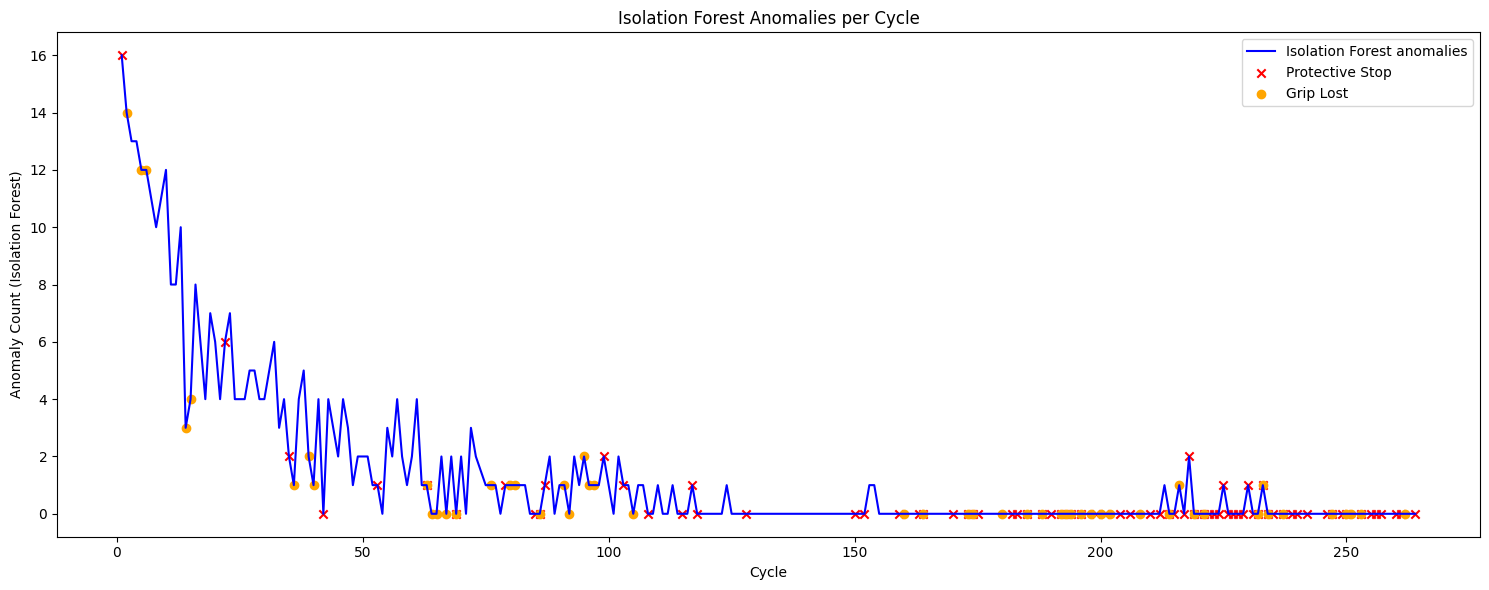

In [97]:
plt.figure(figsize=(15,6))
plt.plot(cycle_anoms['cycle '], cycle_anoms['iso_anom'], label="Isolation Forest anomalies", color="blue")
plt.scatter(cycle_anoms['cycle '][cycle_anoms['protective']==1],
            cycle_anoms['iso_anom'][cycle_anoms['protective']==1], color="red", marker="x", label="Protective Stop")
plt.scatter(cycle_anoms['cycle '][cycle_anoms['grip']==1],
            cycle_anoms['iso_anom'][cycle_anoms['grip']==1], color="orange", marker="o", label="Grip Lost")
plt.title("Isolation Forest Anomalies per Cycle")
plt.xlabel("Cycle"); plt.ylabel("Anomaly Count (Isolation Forest)")
plt.legend(); plt.tight_layout(); plt.show()

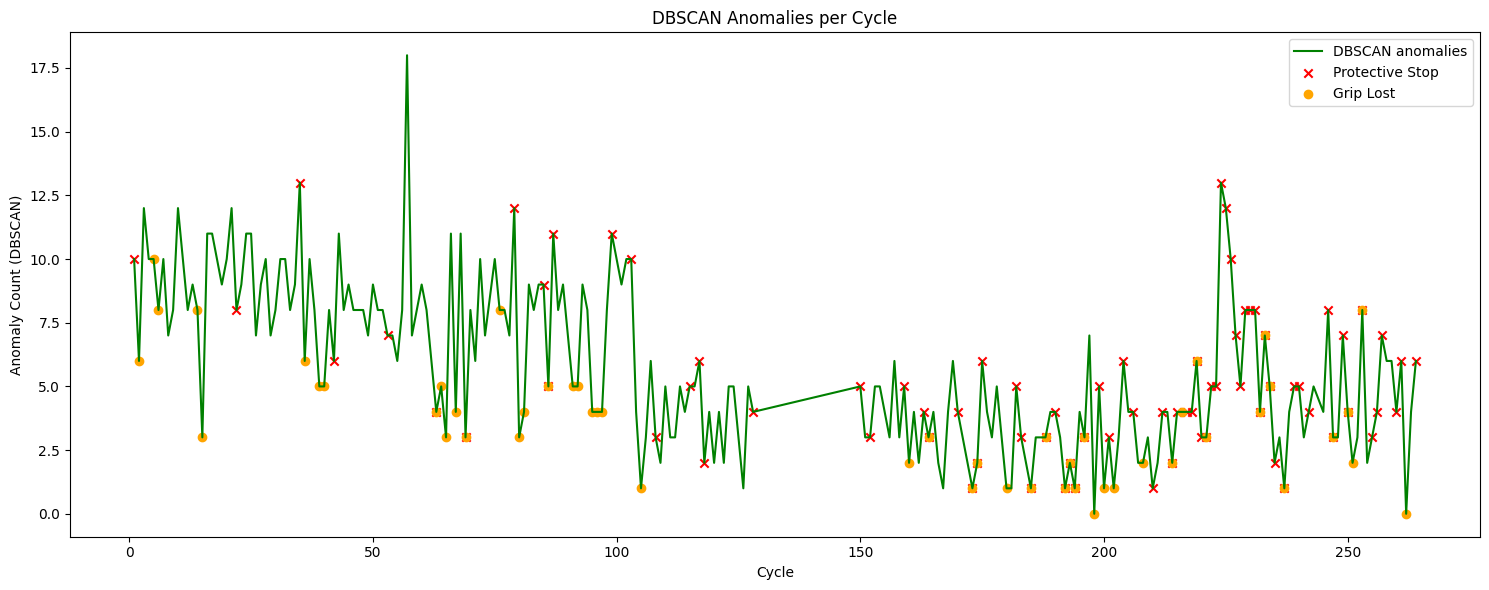

In [98]:
plt.figure(figsize=(15,6))
plt.plot(cycle_anoms['cycle '], cycle_anoms['dbscan_anom'], label="DBSCAN anomalies", color="green")
plt.scatter(cycle_anoms['cycle '][cycle_anoms['protective']==1],
            cycle_anoms['dbscan_anom'][cycle_anoms['protective']==1], color="red", marker="x", label="Protective Stop")
plt.scatter(cycle_anoms['cycle '][cycle_anoms['grip']==1],
            cycle_anoms['dbscan_anom'][cycle_anoms['grip']==1], color="orange", marker="o", label="Grip Lost")
plt.title("DBSCAN Anomalies per Cycle")
plt.xlabel("Cycle"); plt.ylabel("Anomaly Count (DBSCAN)")
plt.legend(); plt.tight_layout(); plt.show()

## Insights from Isolation Forest vs DBSCAN Anomaly Detection


### Isolation Forest
- Isolation Forest flagged **anomalies heavily in the early cycles**, then gradually decreased to almost zero as cycles progressed.
- Many flagged anomalies **overlap with Protective Stops and Grip Loss events**, especially in the early stages.
- However, Isolation Forest seems **too aggressive initially** and then becomes **too strict later**, missing potential anomalies.

### DBSCAN
- DBSCAN produces a **more balanced detection** of anomalies across the entire timeline.
- It consistently detects anomalies around **Protective Stops and Grip Loss** events.
- Unlike Isolation Forest, DBSCAN continues to identify smaller anomaly clusters later, which may capture subtle but important deviations.

### Comparison
- **Isolation Forest** is useful for spotting **clear, strong anomalies** but tends to over flag at the start and under flag later.
- **DBSCAN** provides **better coverage** across cycles and aligns more closely with the observed faults (Protective Stops, Grip Loss).
- This suggests DBSCAN may be **more reliable for predictive maintenance**, as it captures recurring anomaly patterns instead of only extreme ones.

